In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip3 install pccdr==1.0.2

In [3]:
!pip install torchdr==0.2 #scikit-learn==1.6.1

In [4]:
!pip install kneed

In [5]:
!pip install zadu

In [6]:
!pip install fuzzy-c-means

In [7]:
!pip install adjustText

  Using cached adjustText-1.3.0-py3-none-any.whl.metadata (3.1 kB)
Using cached adjustText-1.3.0-py3-none-any.whl (13 kB)


In [8]:
#!pip install UMAP
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdr 0.2 requires scikit-learn<1.5, but you have scikit-learn 1.7.1 which is incompatible.


In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import Isomap, TSNE
from sklearn.neighbors import NearestNeighbors
from umap import UMAP
#import umap.umap_ as umap

from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from fcmeans import FCM

from scipy import stats
from scipy.stats import zscore

from sklearn.metrics import silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D
from adjustText import adjust_text

from fcmeans import FCM
from sklearn.manifold import trustworthiness

from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import pairwise_distances

import matplotlib.cm as cm
from sklearn.cluster import KMeans

In [10]:
from zadu import zadu
from zaduvis import zaduvis

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [11]:
from pcc import PCUMAP, PCC

In [ ]:
# mount drive
import os
folder_path = # path to folder

files = os.listdir(folder_path)
print(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Code', 'Dataset_Labels.xlsx', 'Dataset Intensity 2', 'Dataset Binary', 'dendritic_spine_morphology_full.csv', 'Figures', 'Methods Paper Outline.gdoc', 'Sections Outline.gsheet', 'Draft.gdoc', 'Data_SpineJ', 'spineJ_features_df.csv', 'Structural Outline.gdoc', 'merged_spine_data.csv', 'merged_spine_data_feature_ver.csv', 'feature_boxplots_grid_trimmed.png', 'Potential Reviewers.gdoc', 'Paper feedback notes.gdoc', 'Paper materials!!!!.gdoc', 'PLOS_CoverLetter.docx', 'Supporting Information - Dendritic Spine Clustering .gdoc']


In [ ]:
spine_features_path = # path to feature dataframe

spine_features = pd.read_csv(spine_features_path)
print(spine_features.shape)
print(spine_features.head())

(447, 33)
   Spine Name  Length neck (nm)  Length spine (nm)  Ratio (%)  \
0           1           155.671           1035.950     15.027   
1           2           266.428            786.271     33.885   
2           3           804.383           1521.639     52.863   
3           4           502.941           1538.844     32.683   
4           5           301.784           1080.420     27.932   

   Minor axis (nm)  Major axis (nm)  Aspect Ratio  Perimeter Head (nm)  \
0          649.809          771.614         0.842             2302.584   
1          383.985          463.591         0.828             1343.210   
2          630.515          659.359         0.956             2090.376   
3          625.919          812.405         0.770             2292.985   
4          437.596          685.737         0.638             1799.003   

   Area Head (nm²)  Smallest neckwidth (nm)  ...  Mean_Intensity  \
0       392224.246                  225.421  ...       91.809274   
1       139652.432

In [14]:
# load + drop nan and non siginificant features

df = spine_features
df = df.dropna()
outliers_to_drop = [54,56,203,441,429,436,431,418,338,109]
df = df[~df['Spine Name'].isin(outliers_to_drop)]

features = df.drop(['Spine Name', 'Spine Label'], axis=1)
labels = df['Spine Label']
feature_names = features.columns.tolist()
label_codes = labels.astype('category').cat.codes
unique_labels = labels.unique()

# feature scaling
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

In [60]:
# function for applying dimensionality reduction techniques
def apply_dimensionality_reduction(X):
    dr_results = {}

    # linear:
    pca_result = PCA(n_components=3).fit_transform(X)

    # nonlinear:
    isomap_result = Isomap(n_components=3).fit_transform(X)
    tsne_result = TSNE(n_components=3, perplexity=100, random_state=1212).fit_transform(X)
    umap_result = UMAP(n_components=3, n_neighbors=30, min_dist=0.3, random_state=42).fit_transform(X)

    # ensure consistent sample counts across all methods
    assert pca_result.shape[0] == X.shape[0], "PCA output mismatch"
    assert isomap_result.shape[0] == X.shape[0], "ISOMAP output mismatch"
    assert tsne_result.shape[0] == X.shape[0], "t-SNE output mismatch"
    assert umap_result.shape[0] == X.shape[0], "UMAP output mismatch"

    #pcumap
    kmeans = KMeans(n_clusters=16, random_state=42).fit(X)

    pcumap = PCUMAP(
        n_components=3,
        n_neighbors=30,
        min_dist=0.3,
        correlation_loss_weight=1000,
        beta=10,
        pearson=True,
        spearman=False,
        verbose=True,
        random_state=1178
    )
    pcumap_result = pcumap.fit_transform(X, y=labels)


    # store outputs
    dr_results['PCA'] = pca_result
    dr_results['ISOMAP'] = isomap_result
    dr_results['TSNE'] = tsne_result
    dr_results['UMAP'] = umap_result
    dr_results['PCUMAP'] = pcumap_result

    return dr_results

In [61]:
##
# apply all dimred methods
dr_embeddings = apply_dimensionality_reduction(scaled_features)
##

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[TorchDR] Initializing DR model PCUMAP. 
[TorchDR] Affinity : computing the input affinity matrix of UMAP.
[TorchDR] Affinity : sparsity mode enabled, computing 30 nearest neighbors. If this step is too slow, consider reducing the dimensionality of the data using PCA or disabling sparsity.
[TorchDR] 8 evaluation(s) to set the bounds of the root search.


[TorchDR] Root search : mean abs value =  2.01e-05 (std =  4.04e-05) :   3%|▎         | 3/100 [00:00<00:00, 260.13it/s]
[TorchDR] DR Loss : 9.88e+02 | Grad norm : 1.45e+01 : 100%|██████████| 2000/2000 [00:38<00:00, 52.56it/s]


In [62]:
# Feature correlation heatmaps
def plot_correlation_heatmap(embedding, method_name, X_original, feature_names):
    # correlations between original features and reduced feature components
    correlations = pd.DataFrame(index=feature_names)
    for i in range(embedding.shape[1]):
        correlations[f'{method_name}_{i+1}'] = np.corrcoef(X_original[:, :], embedding[:, i], rowvar=False)[:X_original.shape[1], 1]

    # plotting
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Feature Contributions to {method_name} Dimensions')
    plt.xlabel('Dimensionality Reduction Components')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.savefig(f'{method_name}_feature_contributions_heatmap.png', dpi=300)
    plt.show()

def calculate_metrics(embedding, X_original):
    metrics = {}

    # Dimensionality reduction quality metrics
    metrics['Trustworthiness'] = trustworthiness(X_original, embedding)
    metrics['Continuity'] = continuity(X_original, embedding)
    metrics['LCMC'] = local_continuity_meta_criterion(X_original, embedding)
    metrics['MRRE'] = mean_relative_rank_error(X_original, embedding)

    # Correlation of pairwise distances
    original_dists = pairwise_distances(X_original)
    embedding_dists = pairwise_distances(embedding)

    # Flatten upper triangle (excluding diagonal) to avoid redundancy
    triu_idx = np.triu_indices_from(original_dists, k=1)
    orig_flat = original_dists[triu_idx]
    embed_flat = embedding_dists[triu_idx]

    metrics['Pearson'] = pearsonr(orig_flat, embed_flat)[0]
    metrics['Spearman'] = spearmanr(orig_flat, embed_flat)[0]

    return metrics

def local_continuity_meta_criterion(X_original, embedding, k=10):
    knn_original = NearestNeighbors(n_neighbors=k).fit(X_original).kneighbors(X_original, return_distance=False)
    knn_embedding = NearestNeighbors(n_neighbors=k).fit(embedding).kneighbors(embedding, return_distance=False)

    overlap_count = np.sum([len(set(knn_original[i]) & set(knn_embedding[i])) for i in range(len(X_original))])

    return overlap_count / (k * len(X_original))

def continuity(X_original, embedding, n_neighbors=5):
    n = X_original.shape[0]
    neigh_orig = NearestNeighbors(n_neighbors=n_neighbors).fit(X_original).kneighbors(X_original, return_distance=False)
    neigh_embed = NearestNeighbors(n_neighbors=n_neighbors).fit(embedding).kneighbors(embedding, return_distance=False)

    sum_ranks = 0
    for i in range(n):
        missing = set(neigh_orig[i]) - set(neigh_embed[i])
        for neighbor in missing:
            sum_ranks += list(neigh_embed[i]).index(neighbor) if neighbor in list(neigh_embed[i]) else n_neighbors

    return 1 - (2 / (n * n_neighbors * (2 * n - 3 * n_neighbors - 1))) * sum_ranks


def mean_relative_rank_error(X_original, embedding, n_neighbors=10):
    n = X_original.shape[0]
    neigh_orig = NearestNeighbors(n_neighbors=n_neighbors).fit(X_original).kneighbors(X_original, return_distance=False)
    neigh_embed = NearestNeighbors(n_neighbors=n_neighbors).fit(embedding).kneighbors(embedding, return_distance=False)

    total_error = 0
    for i in range(n):
        for j in range(1, n_neighbors):
            rank_orig = np.where(neigh_orig[i] == neigh_embed[i][j])[0]
            if len(rank_orig) > 0:
                total_error += abs(rank_orig[0] - j)
            else:
                total_error += n_neighbors

    return total_error / (n * n_neighbors)


In [63]:
def plot_3d_embedding(embedding, method_name):
    palette = sns.color_palette("tab10", len(unique_labels))
    label_color_map = {label: palette[i] for i, label in enumerate(unique_labels)}

    # Marker styles for each label
    marker_styles = ['o', '^', 's', 'P', 'D', 'X', '*', 'v', '<', '>']
    label_marker_map = {label: marker_styles[i % len(marker_styles)] for i, label in enumerate(unique_labels)}

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each label separately to assign colors and markers
    for label in unique_labels:
        idx = labels == label
        ax.scatter(
            embedding[idx, 0], embedding[idx, 1], embedding[idx, 2],
            color=label_color_map[label],
            marker=label_marker_map[label],
            label=label,
            edgecolors='k',
            s=200,
            alpha=0.8
        )

    ax.set_title(f'Dendritic Spine Morphological Data Projected Into 3D Feature Space using {method_name}')
    ax.set_xlabel(f'{method_name} 1', fontsize=30)
    ax.set_ylabel(f'{method_name} 2', fontsize=30)
    ax.set_zlabel(f'{method_name} 3', fontsize=30)

    # Set axis limits
    ax.set_xlim(embedding[:, 0].min(), embedding[:, 0].max())
    ax.set_ylim(embedding[:, 1].min(), embedding[:, 1].max())
    ax.set_zlim(embedding[:, 2].min(), embedding[:, 2].max())

    # View angle
    ax.view_init(elev=45, azim=45)
    #ax.view_init(elev=0, azim=0)

    ax.grid(False)
    #ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    # set axes to 0
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')

    # ax.xaxis._axinfo['grid']['linewidth'] = 20
    # ax.yaxis._axinfo['grid']['linewidth'] = 20
    # ax.zaxis._axinfo['grid']['linewidth'] = 20

    # # Set background to gray
    # ax.xaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))
    # ax.yaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))
    # ax.zaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))

    # Legend
    ax.legend(title='Spine Type', loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)

    plt.tight_layout()
    plt.savefig(f'{method_name}_3d_plot.png')
    plt.show()

In [64]:
import plotly.graph_objects as go

def plot_3d_embedding_interactive(embedding, method_name, spine_names, labels):
    # Create color map
    palette = sns.color_palette("tab10", len(np.unique(labels)))
    label_color_map = {label: f'rgb({int(r*255)}, {int(g*255)}, {int(b*255)})'
                       for label, (r, g, b) in zip(np.unique(labels), palette)}
    colors = [label_color_map[label] for label in labels]

    # Create 3D scatter plot with hover text
    fig = go.Figure()

    for label in np.unique(labels):
        mask = (labels == label)
        fig.add_trace(go.Scatter3d(
            x=embedding[mask, 0],
            y=embedding[mask, 1],
            z=embedding[mask, 2],
            mode='markers',
            marker=dict(
                size=5,
                color=label_color_map[label],
                line=dict(width=0.5, color='black')
            ),
            text=[f"Spine Name: {spine_names[i]}" for i in range(len(spine_names)) if mask[i]],
            hoverinfo='text',
            name=label
        ))

    fig.update_layout(
        title=f'Dendritic Spine Morphological Data Projected Into 3D Feature Space using {method_name}',
        scene=dict(
            xaxis_title=f'{method_name} 1',
            yaxis_title=f'{method_name} 2',
            zaxis_title=f'{method_name} 3'
        ),
        legend_title_text='Spine Type',
        width=900,
        height=700
    )

    fig.show()

In [65]:
def plot_zadu_3d_distortion(embedding, method_name, X_original, k=10, save_dir='.', vmin_t=None, vmax_t=None, vmin_c=None, vmax_c=None):
    try:
        spec = [{"id": "tnc", "params": {"k": k}}]
        zadu_obj = zadu.ZADU(orig=X_original, spec_list=spec, return_local=True)
        _, local_scores = zadu_obj.measure(embedding)
        tnc_local = local_scores[0]

        # Trustworthiness
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111, projection='3d')
        sc = ax.scatter(
            embedding[:, 0], embedding[:, 1], embedding[:, 2],
            c=tnc_local["local_trustworthiness"],
            cmap='viridis', s=30, alpha=0.9,
            vmin=vmin_t, vmax=vmax_t
        )
        cbar = plt.colorbar(sc)
        cbar.set_label('Local Trustworthiness', fontsize=20)
        cbar.ax.tick_params(labelsize=15)
        ax.set_title(f'{method_name} - 3D Trustworthiness Map')
        ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
        ax.view_init(elev=45, azim=45)
        plt.tight_layout()
        plt.savefig(f'{save_dir}/{method_name}_3d_trustworthiness.png', dpi=300)
        plt.close()

        # Continuity
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111, projection='3d')
        sc = ax.scatter(
            embedding[:, 0], embedding[:, 1], embedding[:, 2],
            c=tnc_local["local_continuity"],
            cmap='plasma', s=30, alpha=0.9,
            vmin=vmin_c, vmax=vmax_c
        )
        cbar = plt.colorbar(sc)
        cbar.set_label('Local Continuity', fontsize=20)
        cbar.ax.tick_params(labelsize=15)
        ax.set_title(f'{method_name} - 3D Continuity Map')
        ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
        ax.view_init(elev=45, azim=45)
        plt.tight_layout()
        plt.savefig(f'{save_dir}/{method_name}_3d_continuity.png', dpi=300)
        plt.close()

        return tnc_local["local_trustworthiness"], tnc_local["local_continuity"]

    except Exception as e:
        print(f"ZADU 3D distortion plot failed for {method_name}: {e}")
        return None, None


In [66]:
all_trust = []
all_cont = []

# compute distortion min/max and global scaling
for method_name, embedding in dr_embeddings.items():
    spec = [{"id": "tnc", "params": {"k": 10}}]
    zadu_obj = zadu.ZADU(orig=scaled_features, spec_list=spec, return_local=True)
    _, local_scores = zadu_obj.measure(embedding)
    tnc_local = local_scores[0]
    all_trust.append(tnc_local["local_trustworthiness"])
    all_cont.append(tnc_local["local_continuity"])

vmin_t = np.percentile(all_trust, 5)
vmax_t = np.percentile(all_trust, 95)

vmin_c = np.percentile(all_cont, 5)
vmax_c = np.percentile(all_cont, 95)

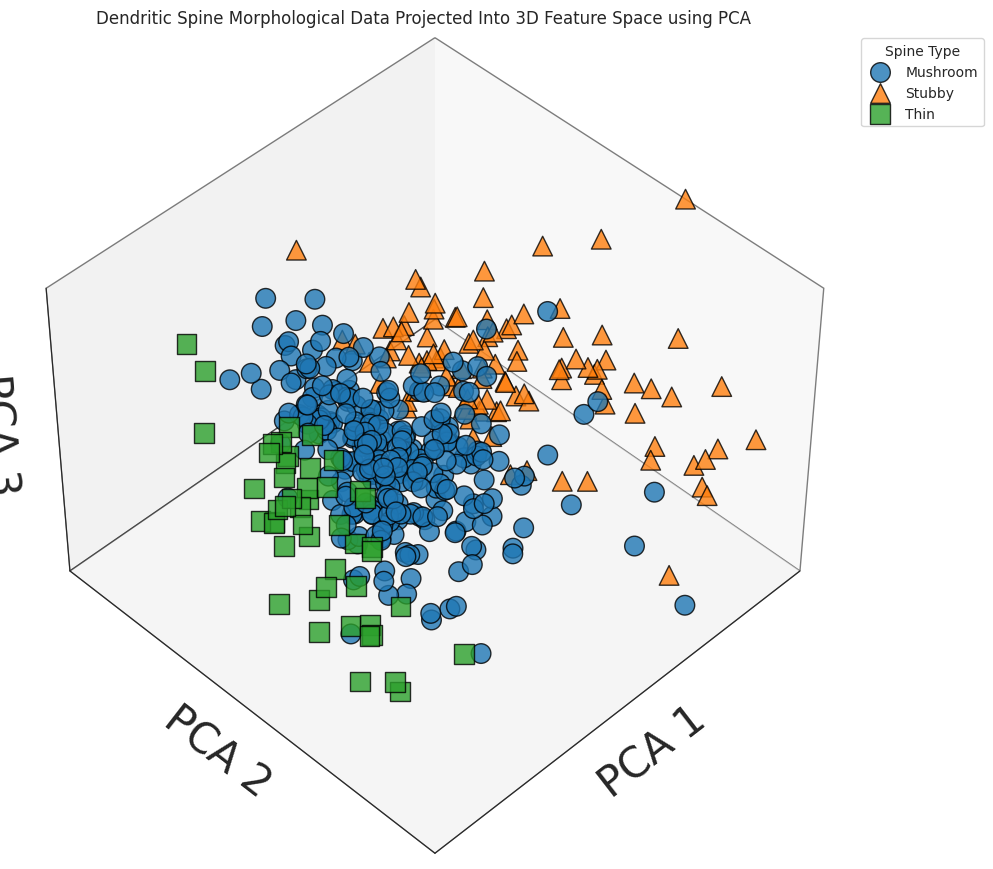

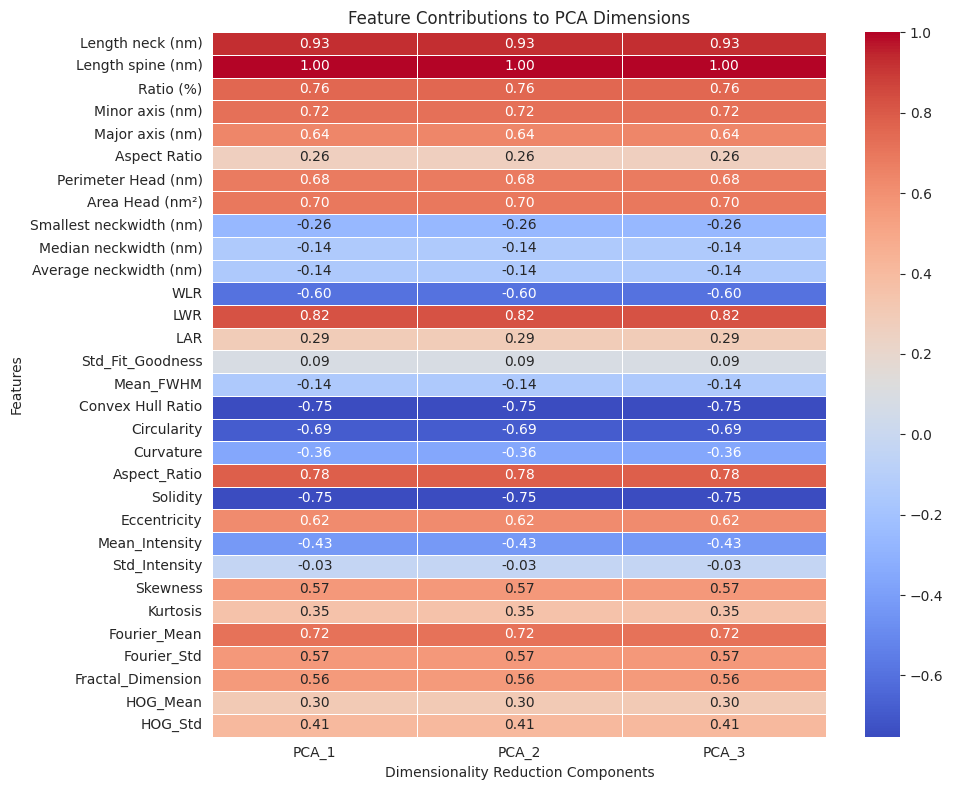

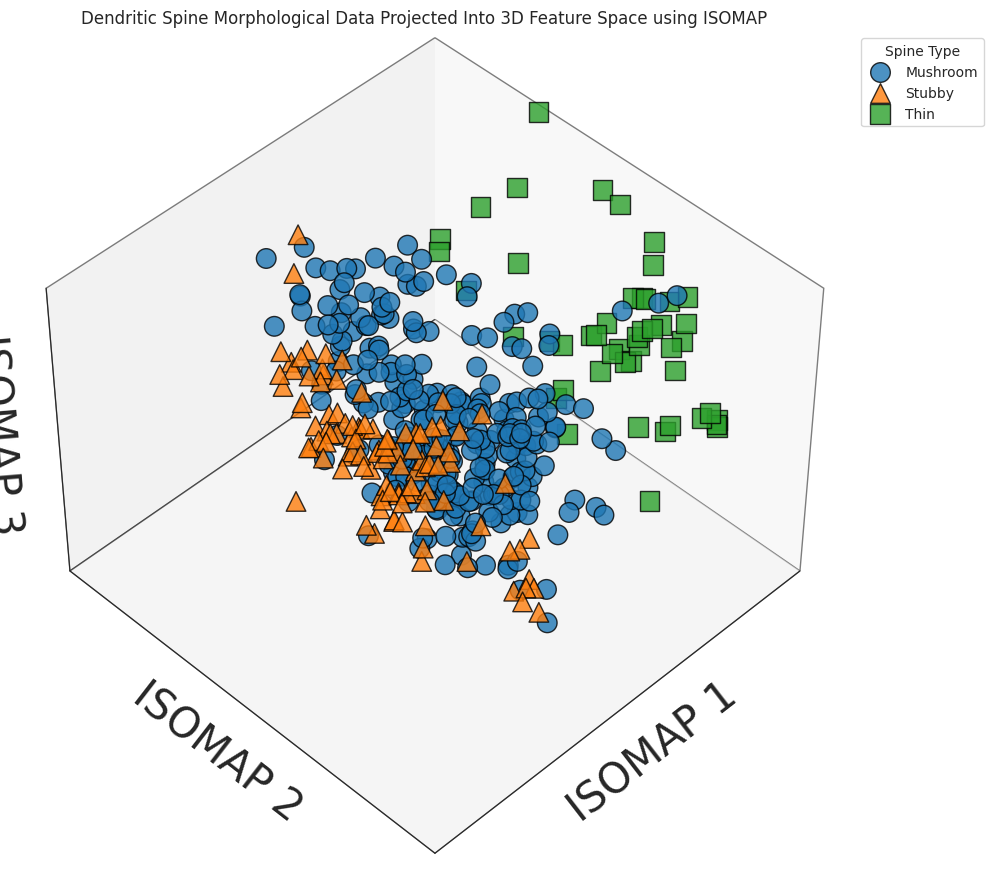

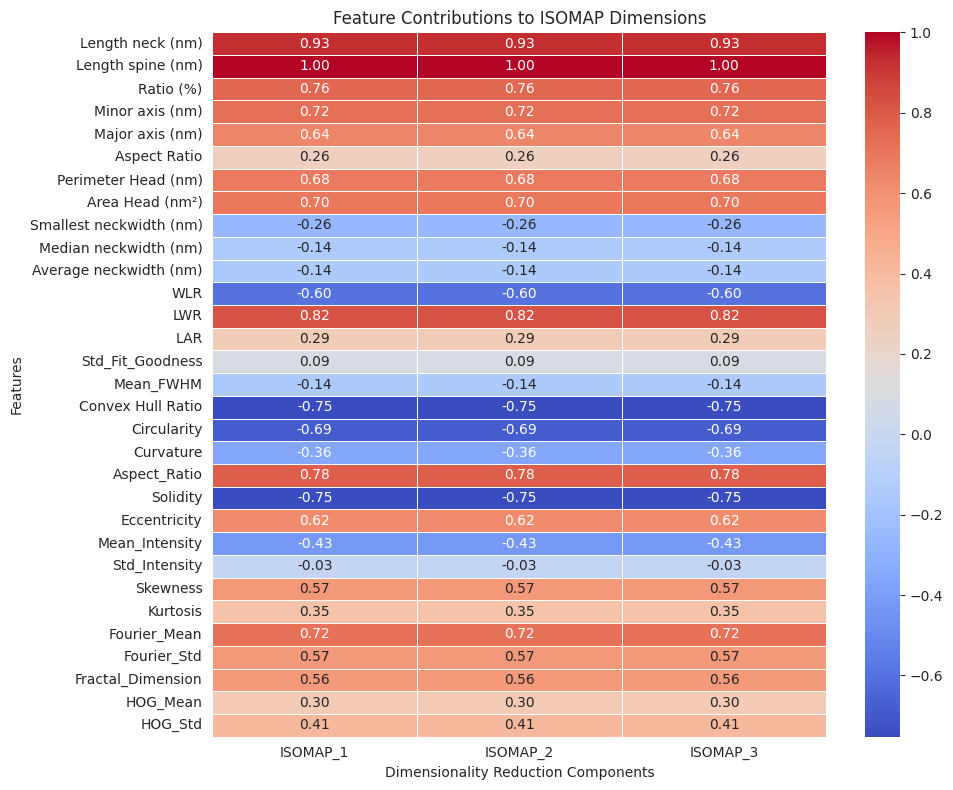

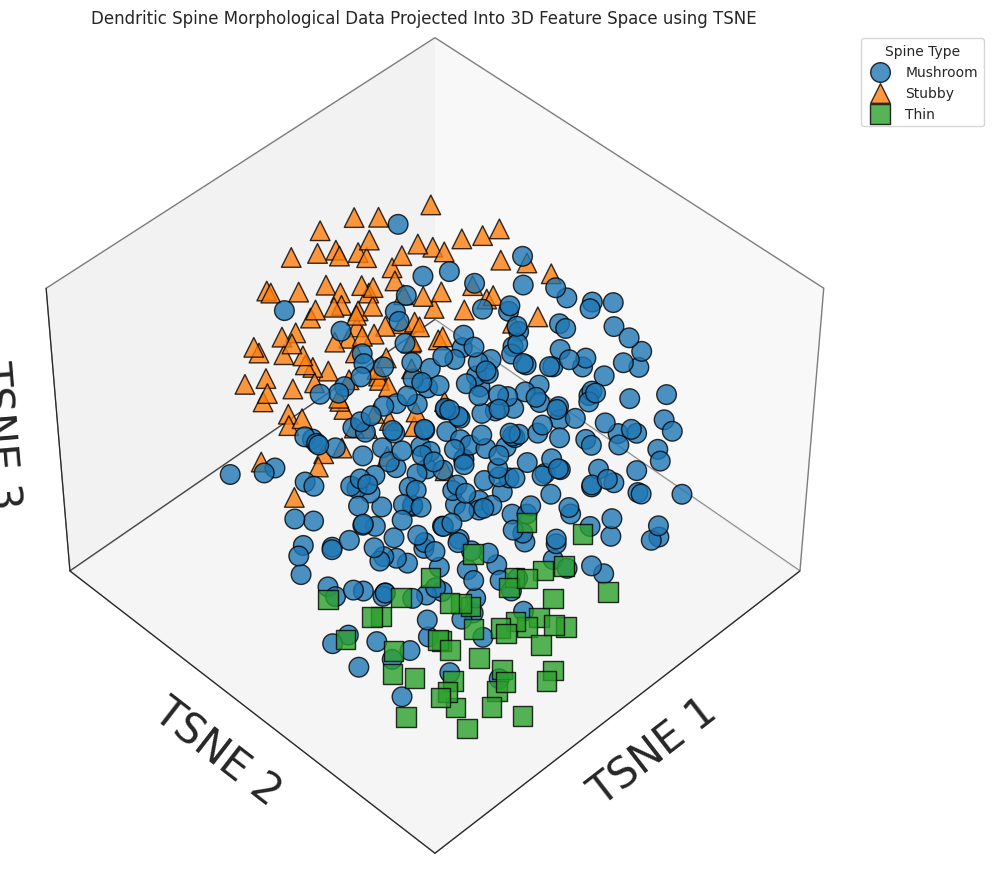

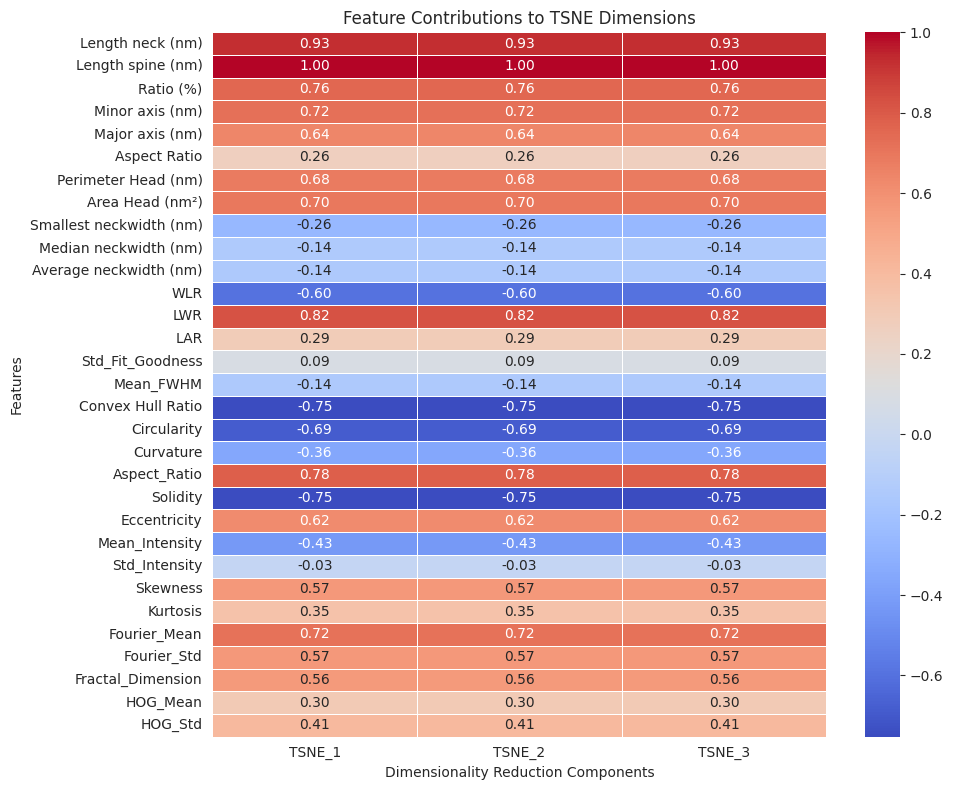

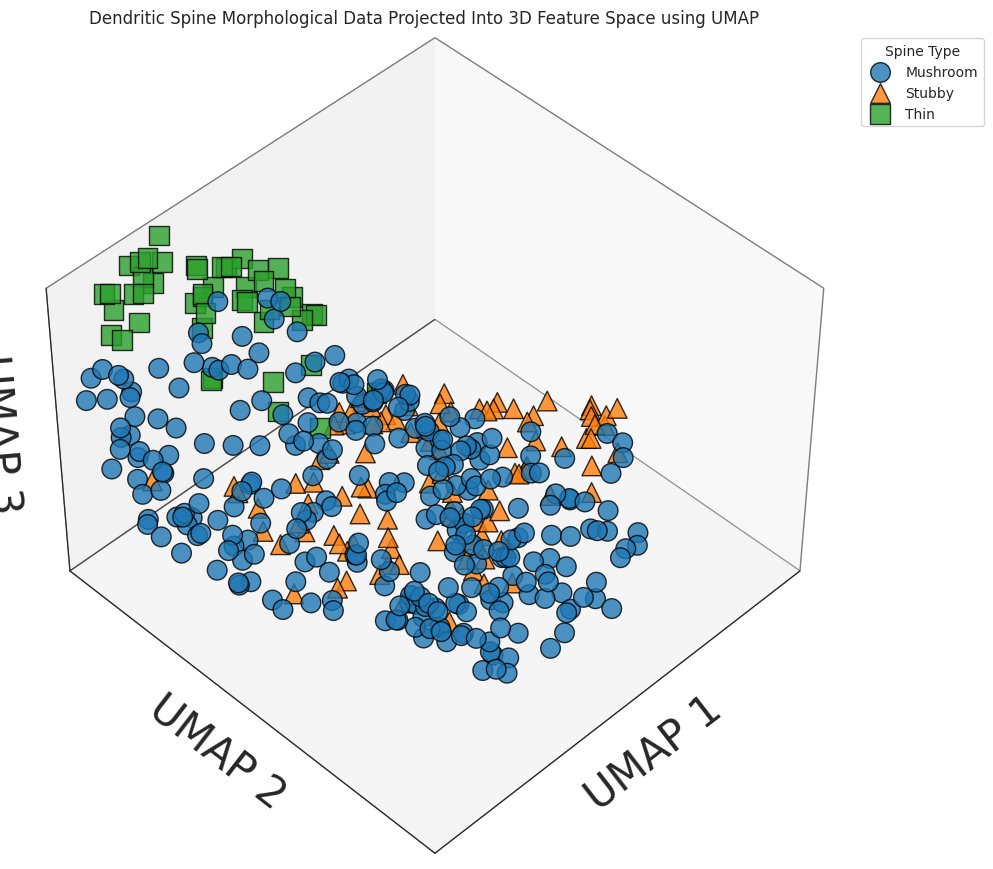

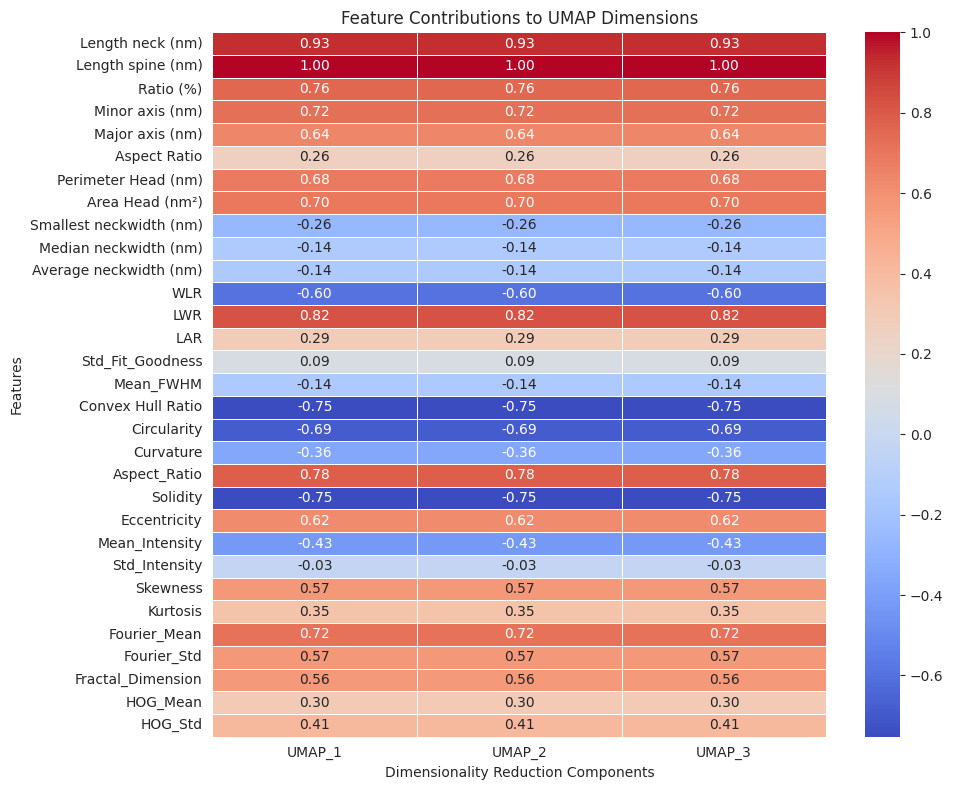

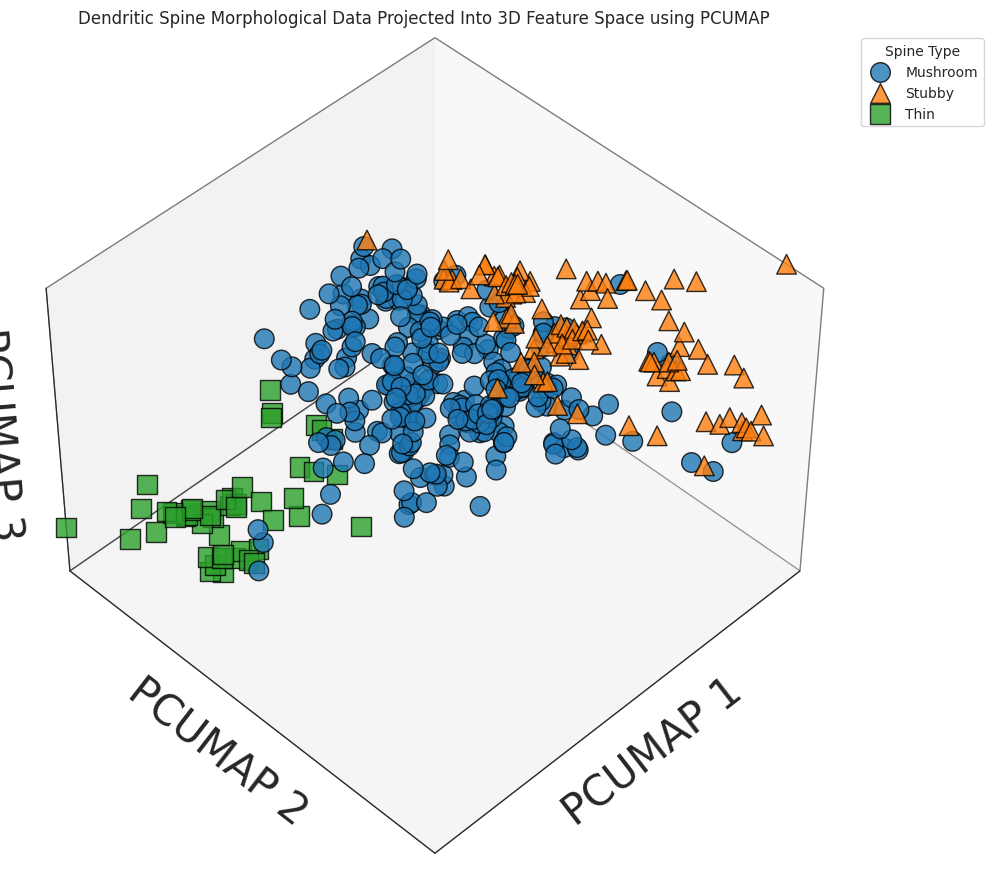

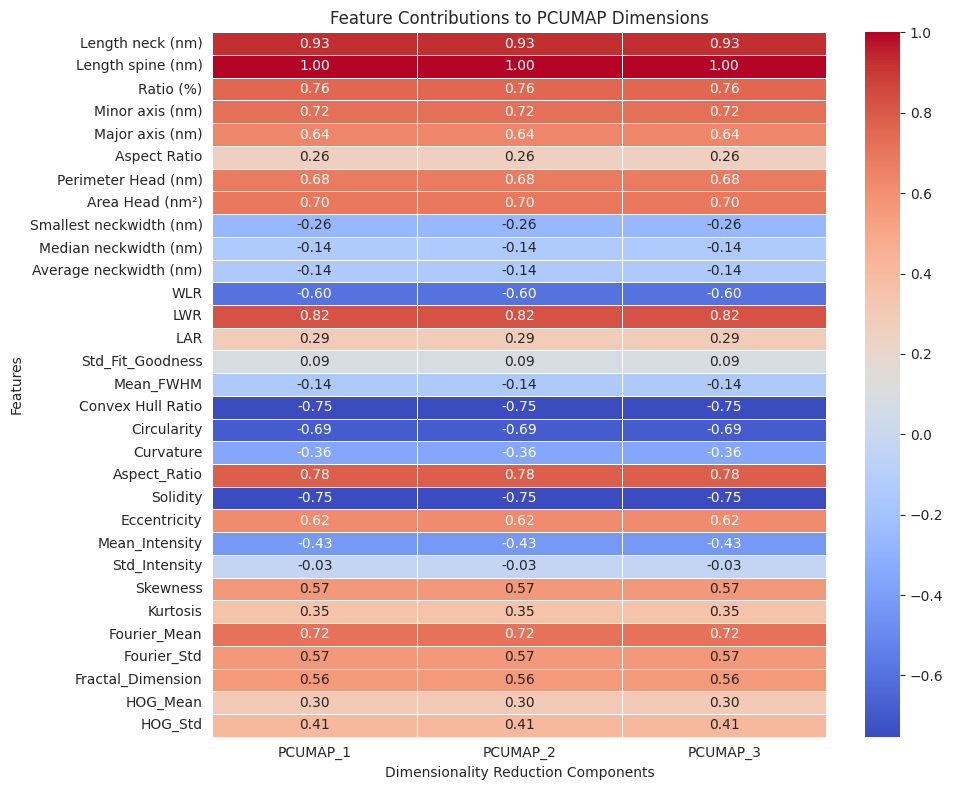

   Method  Trustworthiness  Continuity      LCMC      MRRE   Pearson  \
0     PCA         0.935361    0.993360  0.444037  6.475000  0.961161   
1  ISOMAP         0.928311    0.993221  0.435092  6.582339  0.919687   
2    TSNE         0.974685    0.995483  0.549083  5.386927  0.769964   
3    UMAP         0.962148    0.994609  0.543349  5.632569  0.823221   
4  PCUMAP         0.966384    0.994797  0.539679  5.596330  0.924906   

   Spearman  Variance Explained  
0  0.949423           70.275492  
1  0.899911                 NaN  
2  0.773623                 NaN  
3  0.822522                 NaN  
4  0.914087                 NaN  


In [67]:
metrics_table = []
for method_name, embedding in dr_embeddings.items():
    #plot 3d embedding
    plot_3d_embedding(embedding, method_name)
    # plot_3d_embedding_interactive(embedding, method_name, spine_names=df['Spine Name'].values, labels=df['Spine Label'].values)

    # create heatmaps
    X_original_scaled = RobustScaler().fit_transform(features)
    plot_correlation_heatmap(embedding, method_name, X_original_scaled, features.columns)

    # metrics for each method
    metrics = calculate_metrics(embedding, scaled_features)

    # add explained variance calculation for linear methods
    if method_name == 'PCA':
        pca_model = PCA(n_components=3).fit(scaled_features)
        metrics['Variance Explained'] = 100* np.sum(pca_model.explained_variance_ratio_)
    elif method_name == 'FactorAnalysis':
        fa_model = FactorAnalysis(n_components=3).fit(scaled_features)
        n = fa_model.noise_variance_
        m1 = fa_model.components_**2
        m2 = np.sum(m1,axis=1)
        metrics['Variance Explained'] = np.sum((100*m2)/(np.sum(m2)+np.sum(n)))
    metrics_table.append({'Method': method_name, **metrics})

    # # # distortion maps
    plot_zadu_3d_distortion(embedding=embedding,method_name=method_name,X_original=scaled_features, k=10, vmin_t=vmin_t, vmax_t=vmax_t,vmin_c=vmin_c, vmax_c=vmax_c)

# export metrics
metrics_df = pd.DataFrame(metrics_table)
metrics_df.to_csv('dimensionality_reduction_metrics.csv', index=False)
print(metrics_df)



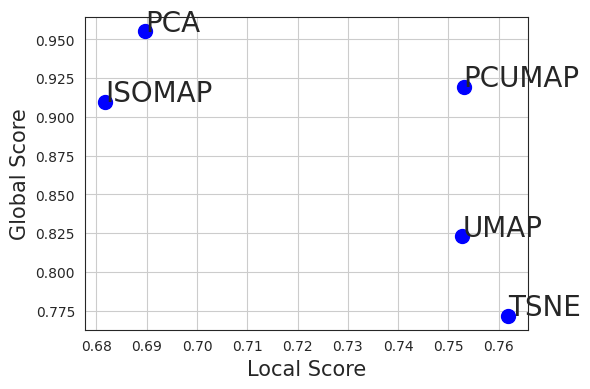

   Method  Trustworthiness  Continuity      LCMC      MRRE   Pearson  \
0     PCA         0.935361    0.993360  0.444037  6.475000  0.961161   
1  ISOMAP         0.928311    0.993221  0.435092  6.582339  0.919687   
2    TSNE         0.974685    0.995483  0.549083  5.386927  0.769964   
3    UMAP         0.962148    0.994609  0.543349  5.632569  0.823221   
4  PCUMAP         0.966384    0.994797  0.539679  5.596330  0.924906   

   Spearman  Variance Explained  Local Score  Global Score  Overall Score  
0  0.949423           70.275492     0.689699      0.955292       0.822495  
1  0.899911                 NaN     0.681701      0.909799       0.795750  
2  0.773623                 NaN     0.761884      0.771794       0.766839  
3  0.822522                 NaN     0.752749      0.822871       0.787810  
4  0.914087                 NaN     0.753031      0.919497       0.836264  


In [92]:
metrics_df['Local Score'] = metrics_df[['Trustworthiness', 'LCMC']].mean(axis=1)
metrics_df['Global Score'] = metrics_df[['Pearson', 'Spearman']].mean(axis=1)

#evaluate if there is a statistically significant difference between overall score between groups
metrics_df['Overall Score'] = 0.5 * metrics_df['Local Score'] + 0.5 * metrics_df['Global Score']

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(metrics_df['Local Score'], metrics_df['Global Score'], color='blue', s=100)

# Annotate points
for i, row in metrics_df.iterrows():
    plt.text(row['Local Score'], row['Global Score'], row['Method'], fontsize=20)

plt.xlabel('Local Score', fontsize=15)
plt.ylabel('Global Score', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

print(metrics_df)

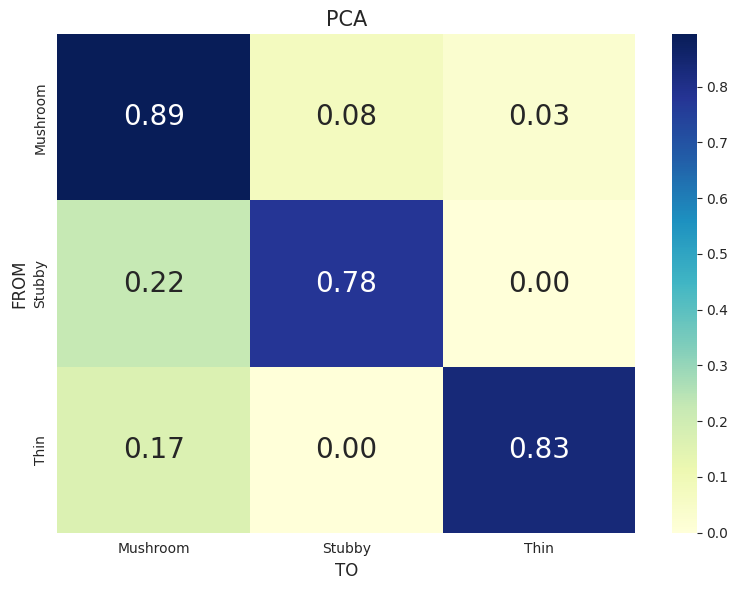

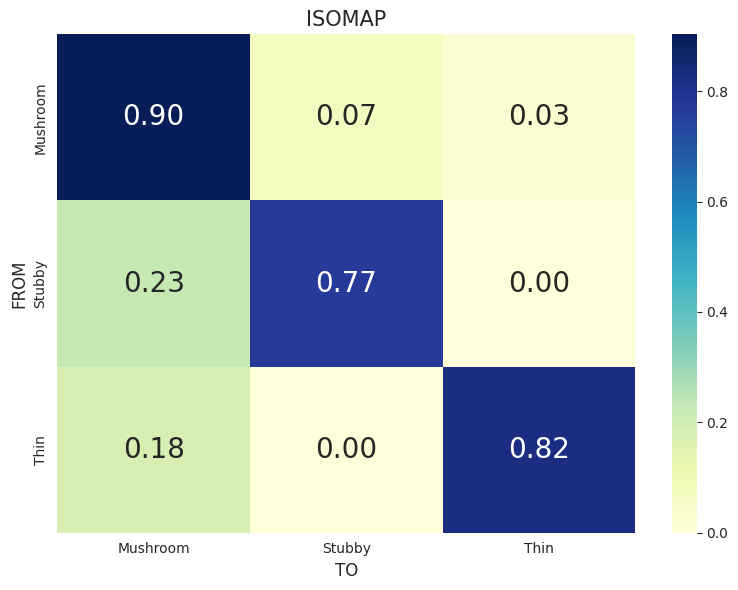

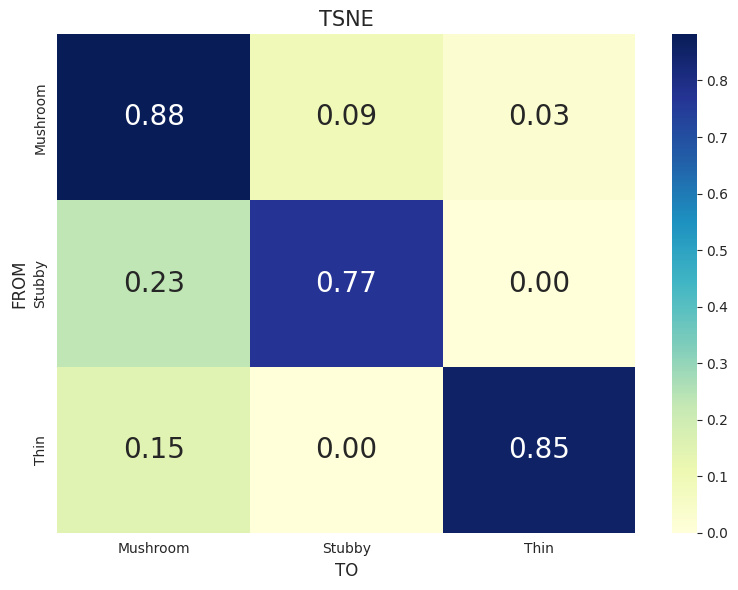

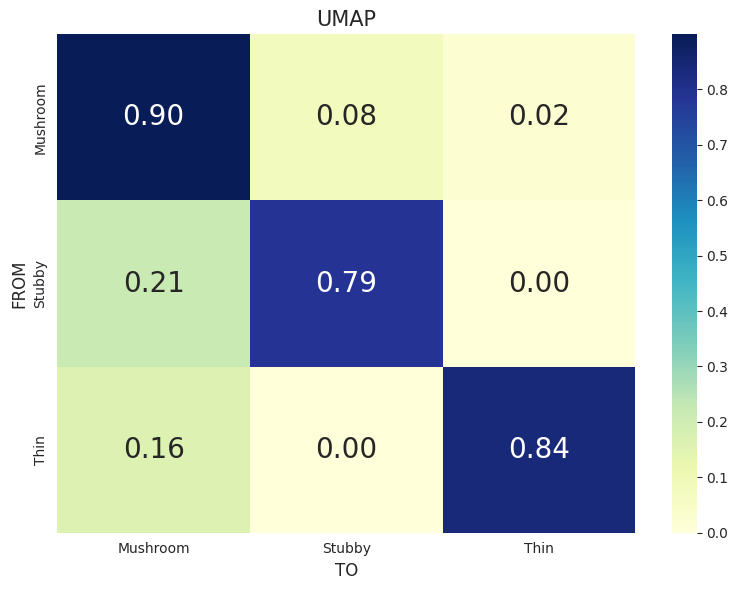

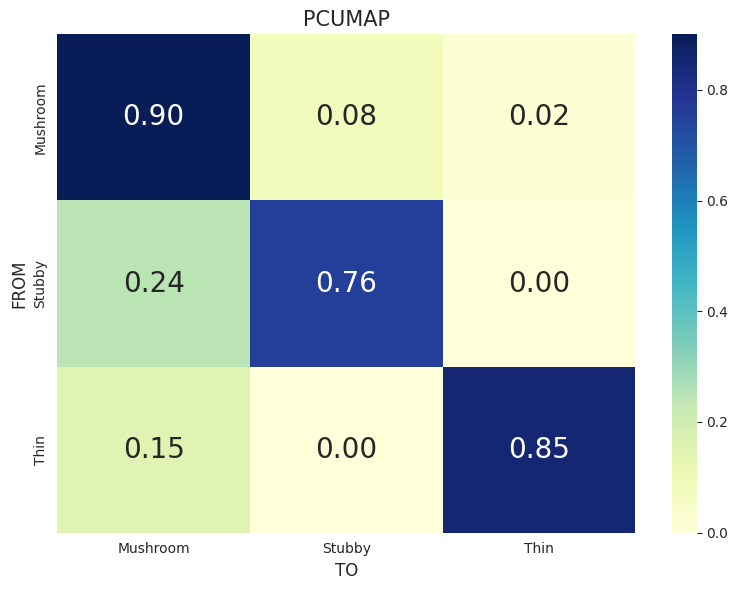

In [69]:
from sklearn.neighbors import NearestNeighbors

def compute_transition_matrix(embedding, labels, n_neighbors=5):
    #  nearest neighbors calculation for each point
    nn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
    nn.fit(embedding)
    _, indices = nn.kneighbors(embedding)

    unique_labels = np.unique(labels)
    n_classes = len(unique_labels)
    transition_matrix = np.zeros((n_classes, n_classes))

    labels_array = labels.to_numpy()


    for i, neighbors in enumerate(indices):
        current_label = labels_array[i]
        for neighbor in neighbors[1:]:  # excluse self as neighbor
            neighbor_label = labels_array[neighbor]
            i_current = np.where(unique_labels == current_label)[0][0]
            i_neighbor = np.where(unique_labels == neighbor_label)[0][0]
            transition_matrix[i_current, i_neighbor] += 1

    # normalize rows
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    transition_matrix = np.divide(transition_matrix, row_sums, where=row_sums!=0)

    return transition_matrix, unique_labels

#plotting
for method_name, embedding in dr_embeddings.items():
    transition_matrix, unique_labels = compute_transition_matrix(embedding, labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(transition_matrix, annot=True, fmt='.2f', cmap='YlGnBu',
                xticklabels=unique_labels, yticklabels=unique_labels, annot_kws={"size": 20})
    plt.title(f'{method_name}', fontsize=15)
    plt.xlabel('TO', fontsize=12)
    plt.ylabel('FROM', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'transition_matrix_{method_name}.png', dpi=300)
    plt.show()


In [70]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def calculate_scores_and_weights(embedding, labels, n=5):
    distances = pdist(embedding)
    distance_matrix = squareform(distances)
    log_distance_matrix = np.log1p(distance_matrix)

    transition_weights = {
        ('Mushroom', 'Mushroom'): 1,
        ('Thin', 'Thin'): 1,
        ('Stubby', 'Stubby'): 1,
        ('Mushroom', 'Stubby'): 0.5,
        ('Mushroom', 'Thin'): 0.5,
        ('Stubby', 'Mushroom'): 0.5,
        ('Thin', 'Mushroom'): 0.5,
        ('Stubby', 'Thin'): 0,
        ('Thin', 'Stubby'): 0
    }

    scores = []
    weights = []
    label_indices = labels.index

    for i in range(len(labels)):
        sorted_indices = np.argsort(log_distance_matrix[i, :])
        nearest_neighbor_indices = sorted_indices[1:n+1]

        for neighbor_idx in nearest_neighbor_indices:
            nearest_log_distance = log_distance_matrix[i, neighbor_idx]
            type_i = labels.loc[label_indices[i]]
            type_j = labels.loc[label_indices[neighbor_idx]]
            weight = transition_weights.get((type_i, type_j), 0)
            score = weight * (1 / (nearest_log_distance + 1))
            scores.append(score)
            weights.append(weight)

    return scores, weights

# Collect all scores and weights across all methods
all_scores = []
all_weights = []

for method_name, embedding in dr_embeddings.items():
    scores, weights = calculate_scores_and_weights(embedding, labels, n=10)
    all_scores.extend(scores)
    all_weights.extend(weights)

# need global normalization to be able to compare across multiple methods
global_max_score = max(all_scores)
global_min_score = min(all_scores)

def calculate_bts(scores, weights, global_min_score, global_max_score):
    normalized_scores = [(s - global_min_score) / (global_max_score - global_min_score) for s in scores]
    total_weight = sum(weights)
    weighted_normalized_scores = [w * s for w, s in zip(weights, normalized_scores)]
    bts = sum(weighted_normalized_scores) / total_weight if total_weight > 0 else 0
    return bts

# Calculate BTS for each method using global normalization
bts_scores = {}
for method_name, embedding in dr_embeddings.items():
    scores, weights = calculate_scores_and_weights(embedding, labels, n=10)
    bts = calculate_bts(scores, weights, global_min_score, global_max_score)
    bts_scores[method_name] = bts


In [71]:
from scipy.spatial.distance import mahalanobis
from sklearn.metrics.pairwise import cosine_similarity

# pairwise Mahalanobis distances
def mahalanobis_distance_matrix(embedding):
    cov_matrix = np.cov(embedding.T)  # Compute covariance matrix
    inv_cov_matrix = np.linalg.pinv(cov_matrix)  # Compute pseudo-inverse
    mahal_distances = np.zeros((len(embedding), len(embedding)))

    for i in range(len(embedding)):
        for j in range(len(embedding)):
            mahal_distances[i, j] = mahalanobis(embedding[i], embedding[j], inv_cov_matrix)

    return mahal_distances

# pairwise cosine similarity and convert to a distance metric
def cosine_distance_matrix(embedding):
    similarity_matrix = cosine_similarity(embedding)
    distance_matrix = 1 - similarity_matrix  # Convert similarity to distance
    return distance_matrix

# compute BTS
def calculate_scores_and_weights_with_metric(embedding, labels, metric='euclidean', n=5):
    if metric == 'mahalanobis':
        distance_matrix = mahalanobis_distance_matrix(embedding)
    elif metric == 'cosine':
        distance_matrix = cosine_distance_matrix(embedding)
    else:  # Default to Euclidean
        distances = pdist(embedding)
        distance_matrix = squareform(distances)

    log_distance_matrix = np.log1p(distance_matrix)

    transition_weights = {
        ('Mushroom', 'Mushroom'): 1,
        ('Thin', 'Thin'): 1,
        ('Stubby', 'Stubby'): 1,
        ('Mushroom', 'Stubby'): 0.5,
        ('Mushroom', 'Thin'): 0.5,
        ('Stubby', 'Mushroom'): 0.5,
        ('Thin', 'Mushroom'): 0.5,
        ('Stubby', 'Thin'): 0,
        ('Thin', 'Stubby'): 0
    }

    scores = []
    weights = []
    label_indices = labels.index

    for i in range(len(labels)):
        sorted_indices = np.argsort(log_distance_matrix[i, :])
        nearest_neighbor_indices = sorted_indices[1:n+1]

        for neighbor_idx in nearest_neighbor_indices:
            nearest_log_distance = log_distance_matrix[i, neighbor_idx]
            type_i = labels.loc[label_indices[i]]
            type_j = labels.loc[label_indices[neighbor_idx]]
            weight = transition_weights.get((type_i, type_j), 0)
            score = weight * (1 / (nearest_log_distance + 1))
            scores.append(score)
            weights.append(weight)

    return scores, weights


bts_scores_by_metric = {'euclidean': {}, 'mahalanobis': {}, 'cosine': {}}

for metric in ['euclidean', 'mahalanobis', 'cosine']:
    all_scores = []
    all_weights = []

    for method_name, embedding in dr_embeddings.items():
        scores, weights = calculate_scores_and_weights_with_metric(embedding, labels, metric=metric, n=10)
        all_scores.extend(scores)
        all_weights.extend(weights)

    # global norm
    global_max_score = max(all_scores)
    global_min_score = min(all_scores)

    for method_name, embedding in dr_embeddings.items():
        scores, weights = calculate_scores_and_weights_with_metric(embedding, labels, metric=metric, n=10)
        bts = calculate_bts(scores, weights, global_min_score, global_max_score)
        bts_scores_by_metric[metric][method_name] = bts
bts_comparison_df = pd.DataFrame(bts_scores_by_metric)
bts_comparison_df

euclidean  mahalanobis    cosine
PCA      0.537532     0.631461  0.867594
ISOMAP   0.423505     0.639360  0.880908
TSNE     0.181242     0.577929  0.860288
UMAP     0.672129     0.657763  0.932505
PCUMAP   0.662154     0.678660  0.892168

/tmp/ipython-input-2723453464.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')


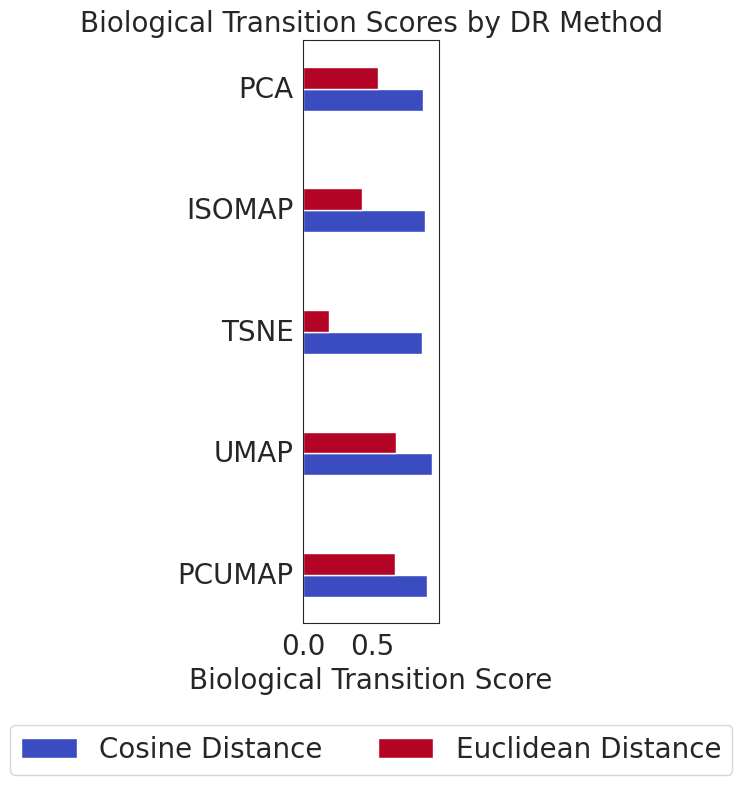

In [72]:
# plot comparing methods performance

# Filter for selected DR methods and metrics
selected_methods = ['PCUMAP', 'UMAP', 'TSNE', 'ISOMAP', 'PCA']
#selected_methods = ['PCUMAP', 'TSNE', 'ISOMAP', 'PCA']

metrics = ['cosine', 'euclidean']

filtered_df = bts_comparison_df.loc[selected_methods, metrics]

n_methods = len(filtered_df)
n_metrics = len(metrics)

cmap = cm.get_cmap('coolwarm')
colors = [cmap(i / (n_metrics - 1)) for i in range(n_metrics)]
bar_height = 0.18
group_height = bar_height * n_metrics * 1.1
y = np.arange(n_methods)
fig, ax = plt.subplots(figsize=(5,8))

for i, metric in enumerate(metrics):
    bar_positions = y - group_height/2 + i * bar_height + bar_height/2
    ax.barh(bar_positions, filtered_df[metric], height=bar_height,
            label=f"{metric.capitalize()} Distance", color=colors[i])

ax.set_title("Biological Transition Scores by DR Method", fontsize=20)
ax.set_xlabel("Biological Transition Score", fontsize=20)
ax.set_yticks(y)
ax.set_yticklabels(selected_methods, fontsize=20)
ax.tick_params(axis='x', labelsize=20)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=20)

ax.grid(False)
plt.tight_layout()
plt.show()


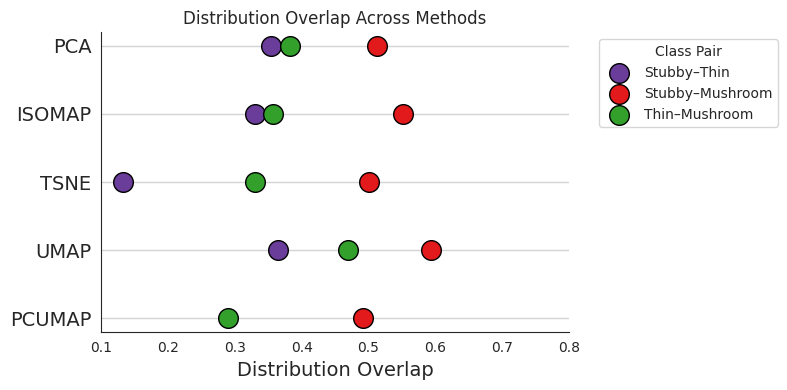

In [85]:
from scipy.stats import gaussian_kde
from itertools import combinations

group_labels = label_codes.to_numpy()

group_names = ['Stubby', 'Thin', 'Mushroom']

def compute_kde_overlap_multi_axis(embedding, group_labels, group_names, axes=[0, 1]):
    results = []

    # Get all pairwise group combinations
    for g1, g2 in combinations(group_names, 2):
        g1_idx = labels == g1
        g2_idx = labels == g2

        g1_data = embedding[g1_idx]
        g2_data = embedding[g2_idx]

        axis_overlaps = []
        for axis in axes:
            kde1 = gaussian_kde(g1_data[:, axis])
            kde2 = gaussian_kde(g2_data[:, axis])

            xs = np.linspace(
                min(g1_data[:, axis].min(), g2_data[:, axis].min()),
                max(g1_data[:, axis].max(), g2_data[:, axis].max()),
                500
            )
            min_curve = np.minimum(kde1(xs), kde2(xs))
            overlap = np.trapz(min_curve, xs)
            axis_overlaps.append(overlap)

        # Choose how to combine across axes:
        combined_overlap = np.mean(axis_overlaps)  # could also do np.min(axis_overlaps) if you want the *best* axis
        results.append({
            'Pair': f'{g1}–{g2}',
            'Overlap': combined_overlap
        })

    return results


overlap_records = []

for method_name, embedding in dr_embeddings.items():
    overlaps = compute_kde_overlap_multi_axis(embedding, group_labels, group_names)
    for r in overlaps:
        overlap_records.append({
            'Method': method_name,
            'Pair': r['Pair'],
            'Overlap': r['Overlap']
        })

overlap_df = pd.DataFrame(overlap_records)


# Assign a color to each pair
pair_colors = {
    'Stubby–Thin': '#6a3d9a',       # Purple
    'Stubby–Mushroom': '#e31a1c',   # Red
    'Thin–Mushroom': '#33a02c'      # Green
}

# Get methods and vertical positions
methods = overlap_df['Method'].unique()[::-1]  # reverse for top-to-bottom order
method_to_y = {method: i for i, method in enumerate(methods)}

plt.figure(figsize=(6, 4))

# Draw baseline lines for each method
for method, y in method_to_y.items():
    plt.plot([0.1, 0.8], [y, y], color='lightgray', linewidth=1, zorder=0)

# Plot dots
for _, row in overlap_df.iterrows():
    method = row['Method']
    pair = row['Pair']
    overlap = row['Overlap']
    y = method_to_y[method]
    plt.scatter(overlap, y, color=pair_colors[pair], s=200, edgecolor='k', zorder=3, label=pair)

# Axis formatting
plt.yticks(range(len(methods)), methods, fontsize=14)
plt.xlim(0.1, 0.8)

plt.xlabel("Distribution Overlap", fontsize=14)
plt.title("Distribution Overlap Across Methods")
plt.grid(False)
plt.tight_layout()

# Avoid repeated legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Class Pair', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()
plt.show()



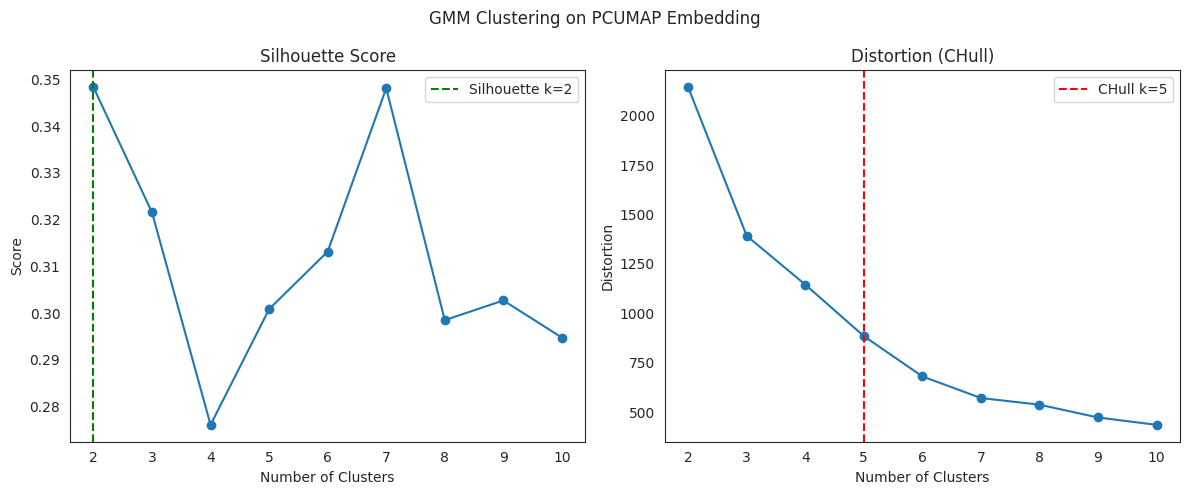

GMM -> Optimal k (Silhouette): 2, Optimal k (CHull): 5


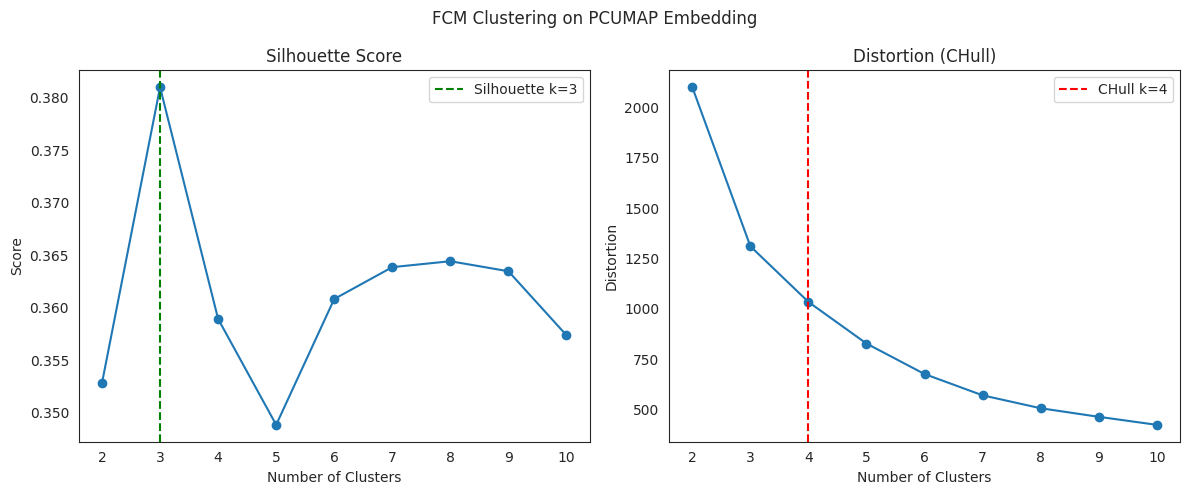

FCM -> Optimal k (Silhouette): 3, Optimal k (CHull): 4


In [74]:
def determine_optimal_clusters_chull_pcumap(embedding, max_clusters=10):
    cluster_range = range(2, max_clusters + 1)

    # Store metrics for both clustering methods
    metrics = {
        'GMM': {'silhouette': [], 'distortion': []},
        'FCM': {'silhouette': [], 'distortion': []}
    }

    for k in cluster_range:
        # GMM
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm_labels = gmm.fit_predict(embedding)
        gmm_centers = gmm.means_
        gmm_dists = np.linalg.norm(embedding[:, np.newaxis, :] - gmm_centers, axis=2)
        metrics['GMM']['silhouette'].append(silhouette_score(embedding, gmm_labels))
        metrics['GMM']['distortion'].append(np.sum(np.min(gmm_dists, axis=1) ** 2))

        # FCM
        fcm = FCM(n_clusters=k)
        fcm.fit(embedding)
        fcm_labels = fcm.predict(embedding)
        fcm_centers = fcm.centers
        fcm_dists = np.linalg.norm(embedding[:, np.newaxis, :] - fcm_centers, axis=2)
        metrics['FCM']['silhouette'].append(silhouette_score(embedding, fcm_labels))
        metrics['FCM']['distortion'].append(np.sum(np.min(fcm_dists, axis=1) ** 2))

    def chull_opt(distortions):
        x = np.array(list(cluster_range))
        y = np.array(distortions)
        p1, p2 = np.array([x[0], y[0]]), np.array([x[-1], y[-1]])
        line_vec = p2 - p1
        line_vec = line_vec / np.linalg.norm(line_vec)
        point_vecs = np.vstack((x - p1[0], y - p1[1])).T
        dists_to_line = np.abs(np.cross(point_vecs, line_vec))
        return x[np.argmax(dists_to_line)]

    # Plot
    for method in ['GMM', 'FCM']:
        sil_scores = metrics[method]['silhouette']
        distortions = metrics[method]['distortion']
        optimal_sil = cluster_range[np.argmax(sil_scores)]
        optimal_chull = chull_opt(distortions)

        plt.figure(figsize=(12, 5))
        plt.suptitle(f'{method} Clustering on PCUMAP Embedding')

        plt.subplot(1, 2, 1)
        plt.plot(cluster_range, sil_scores, marker='o')
        plt.title("Silhouette Score")
        plt.xlabel("Number of Clusters")
        plt.ylabel("Score")
        plt.axvline(optimal_sil, linestyle='--', color='green', label=f'Silhouette k={optimal_sil}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(cluster_range, distortions, marker='o')
        plt.title("Distortion (CHull)")
        plt.xlabel("Number of Clusters")
        plt.ylabel("Distortion")
        plt.axvline(optimal_chull, linestyle='--', color='red', label=f'CHull k={optimal_chull}')
        plt.legend()

        plt.tight_layout()
        plt.show()

        print(f"{method} -> Optimal k (Silhouette): {optimal_sil}, Optimal k (CHull): {optimal_chull}")

    return metrics

metrics_pcumap = determine_optimal_clusters_chull_pcumap(dr_embeddings['PCUMAP'], max_clusters=10)


In [75]:
# updated
def cluster_umap_embedding(embedding, n_clusters):
    clustering_results = {}
    membership_dict = {}

    # FCM
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(embedding)
    labels_fcm = fcm.predict(embedding)
    clustering_results['FCM'] = labels_fcm
    membership_dict['FCM'] = fcm.u.T  # (N, K)

    # GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels_gmm = gmm.fit_predict(embedding)
    clustering_results['GMM'] = labels_gmm
    membership_dict['GMM'] = gmm.predict_proba(embedding)

    # Hierarchical (no soft assignments)
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    labels_hc = hc.fit_predict(embedding)
    clustering_results['Hierarchical'] = labels_hc
    # no entry in membership_dict for hierarchical

    return clustering_results, membership_dict


In [76]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon


def evaluate_clustering(embedding, clustering_results, membership_dict=None):
    rows = []

    for method, labels in clustering_results.items():
        row = {"Method": method}

        # Hard clustering metrics
        row["Silhouette"] = silhouette_score(embedding, labels)
        row["CH Score"] = calinski_harabasz_score(embedding, labels)
        row["DB Score"] = davies_bouldin_score(embedding, labels)

        # Soft clustering metrics
        if membership_dict and method in membership_dict:
            probs = membership_dict[method]

            entropies = entropy(probs.T)
            row["Avg Entropy"] = np.mean(entropies)
            max_entropy = np.log(probs.shape[1])
            row["Avg Sharpness"] = np.mean(1 - entropies / max_entropy)
            row["Avg Max Prob"] = np.mean(np.max(probs, axis=1))

        rows.append(row)



    return pd.DataFrame(rows)


In [77]:
def plot_cluster_results(embedding, cluster_labels, method):
    unique_clusters = np.unique(cluster_labels)
    n_clusters = len(unique_clusters)

    palette = sns.color_palette("Set1", n_clusters)
    label_color_map = {label: palette[i] for i, label in enumerate(unique_clusters)}
    marker_styles = ['o', '^', 's', 'P', 'D', 'X', '*', 'v', '<', '>']
    label_marker_map = {label: marker_styles[i % len(marker_styles)] for i, label in enumerate(unique_clusters)}

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    for label in unique_clusters:
        idx = cluster_labels == label
        ax.scatter(
            embedding[idx, 0], embedding[idx, 1], embedding[idx, 2],
            color=label_color_map[label],
            marker=label_marker_map[label],
            label=f'{label + 1}',
            edgecolors='k',
            s=200,
            alpha=0.8
        )

    ax.set_title(f'Clustering Results in 3D using {method}')
    ax.set_xlabel('PCUMAP 1', fontsize=30)
    ax.set_ylabel('PCUMAP 2', fontsize=30)
    ax.set_zlabel('PCUMAP 3', fontsize=30)

    ax.set_xlim(embedding[:, 0].min(), embedding[:, 0].max())
    ax.set_ylim(embedding[:, 1].min(), embedding[:, 1].max())
    ax.set_zlim(embedding[:, 2].min(), embedding[:, 2].max())

    # View angle
    ax.view_init(elev=45, azim=45)
    #ax.view_init(elev=0, azim=0)

    ax.grid(False)

    ax.xaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))
    ax.yaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))
    ax.zaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')

    # Legend
    ax.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)

    plt.tight_layout()
    plt.savefig(f'PCUMAP_clustering_{method}.png', dpi=300)
    plt.show()




In [78]:
# find spines with high membershps in multipe clusters
def find_transitional_spines(probs, spine_df, threshold=0.35):
    transitional_spines = []

    for i in range(probs.shape[0]):
        high_clusters = np.where(probs[i] > threshold)[0]
        if len(high_clusters) >= 2:
            spine_name = spine_df.iloc[i]['Spine Name']
            transitional_spines.append((spine_name, high_clusters.tolist()))
            print(f"{spine_name} → Clusters: {high_clusters.tolist()} | Memberships: {np.round(probs[i], 3).tolist()}")

    print(f"\nTotal transitional spines found (threshold={threshold}): {len(transitional_spines)}")
    return transitional_spines


def plot_max_membership_by_ground_truth(probs, label_codes, method_name='FCM', bins=15):
    max_probs = np.max(probs, axis=1)
    df = pd.DataFrame({'MaxProb': max_probs, 'Label': label_codes})

    # Define consistent bins
    bin_edges = np.linspace(0, 1, bins + 1)

    # Define custom palette
    unique_labels = sorted(df['Label'].unique())
    palette = sns.color_palette("tab10", len(unique_labels))
    label_color_map = {label: palette[i] for i, label in enumerate(unique_labels)}

    # Count histogram values manually per label
    hist_data = {label: np.histogram(df[df['Label'] == label]['MaxProb'], bins=bin_edges)[0]
                 for label in unique_labels}

    # Stack bars by bottom
    bottom = np.zeros(len(bin_edges) - 1)
    plt.figure(figsize=(7, 4))

    for label in unique_labels:
        values = hist_data[label]
        plt.bar(bin_edges[:-1], values, width=np.diff(bin_edges), align='edge',
                color=label_color_map[label], edgecolor='black', label=f"{label}", bottom=bottom)
        bottom += values

    plt.title("Max Membership Probability by Ground Truth Label", fontsize=16)
    plt.xlabel("Max Membership Probability", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Spine Type", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f"{method_name.lower()}_max_prob_by_ground_truth_clean.png", dpi=300)
    plt.show()

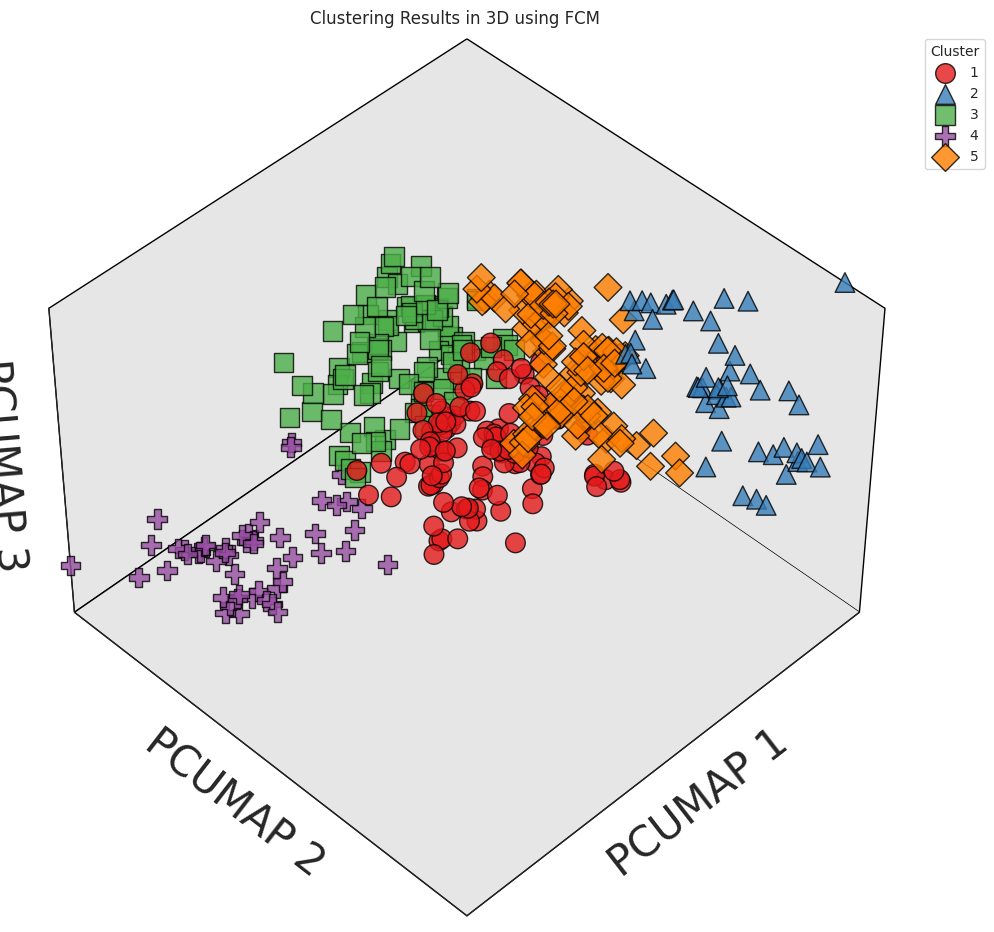

         Method  Silhouette    CH Score  DB Score  Avg Entropy  Avg Sharpness  \
0           FCM    0.348825  382.207242  0.964262     5.397043       0.111984   
1           GMM    0.300840  293.078049  0.989370     0.264557       0.835621   
2  Hierarchical    0.316011  334.744611  1.057115          NaN            NaN   

   Avg Max Prob  
0      0.970220  
1      0.893226  
2           NaN  


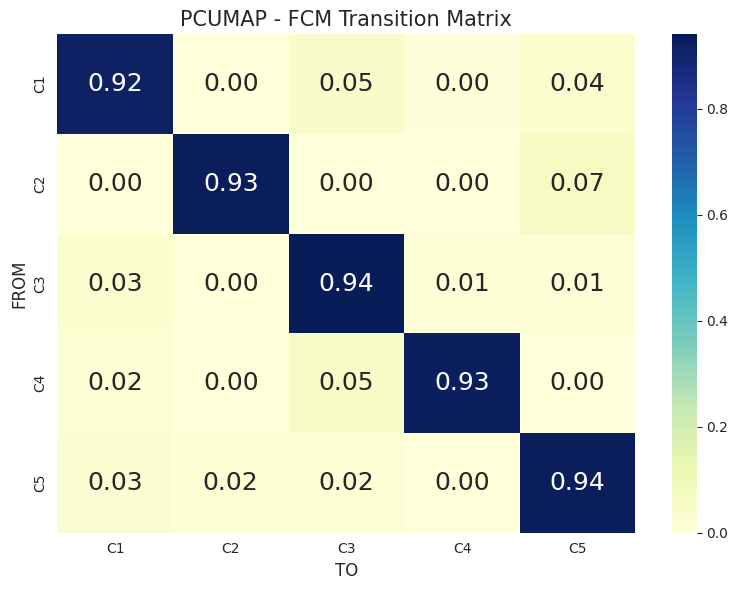

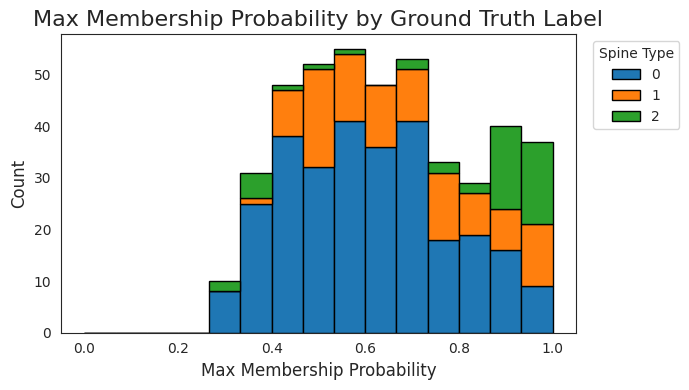

17 → Clusters: [2, 4] | Memberships: [0.179, 0.042, 0.382, 0.019, 0.378]
39 → Clusters: [2, 4] | Memberships: [0.118, 0.073, 0.38, 0.025, 0.404]
40 → Clusters: [0, 2] | Memberships: [0.41, 0.045, 0.356, 0.037, 0.153]
45 → Clusters: [1, 4] | Memberships: [0.067, 0.43, 0.091, 0.02, 0.391]
57 → Clusters: [1, 4] | Memberships: [0.046, 0.504, 0.051, 0.012, 0.387]
58 → Clusters: [0, 2] | Memberships: [0.446, 0.033, 0.354, 0.059, 0.108]
188 → Clusters: [2, 4] | Memberships: [0.115, 0.071, 0.412, 0.026, 0.376]
204 → Clusters: [1, 4] | Memberships: [0.061, 0.375, 0.082, 0.017, 0.465]
219 → Clusters: [2, 4] | Memberships: [0.111, 0.078, 0.366, 0.026, 0.419]
247 → Clusters: [0, 2] | Memberships: [0.413, 0.036, 0.369, 0.071, 0.111]
256 → Clusters: [1, 4] | Memberships: [0.052, 0.464, 0.064, 0.014, 0.406]
287 → Clusters: [1, 4] | Memberships: [0.063, 0.442, 0.082, 0.018, 0.394]
303 → Clusters: [2, 4] | Memberships: [0.127, 0.045, 0.417, 0.018, 0.393]
311 → Clusters: [0, 2] | Memberships: [0.469, 0.

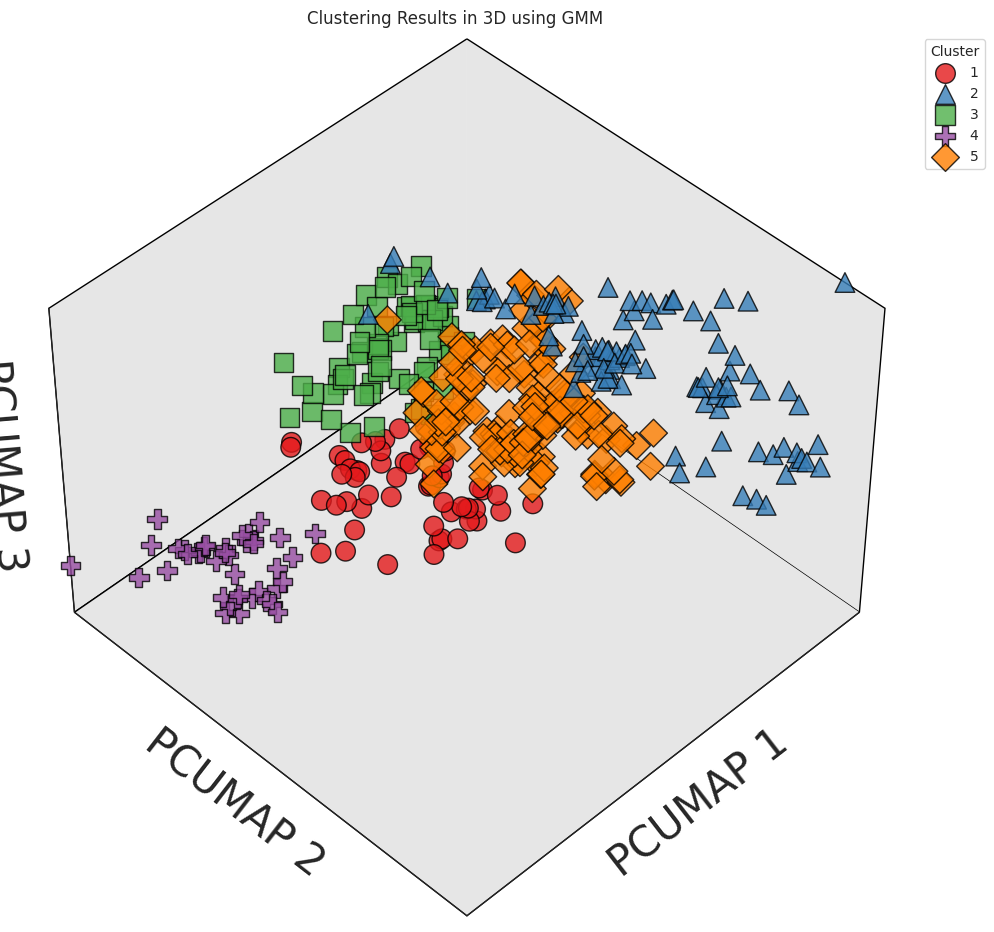

         Method  Silhouette    CH Score  DB Score  Avg Entropy  Avg Sharpness  \
0           FCM    0.348825  382.207242  0.964262     5.397043       0.111984   
1           GMM    0.300840  293.078049  0.989370     0.264557       0.835621   
2  Hierarchical    0.316011  334.744611  1.057115          NaN            NaN   

   Avg Max Prob  
0      0.970220  
1      0.893226  
2           NaN  


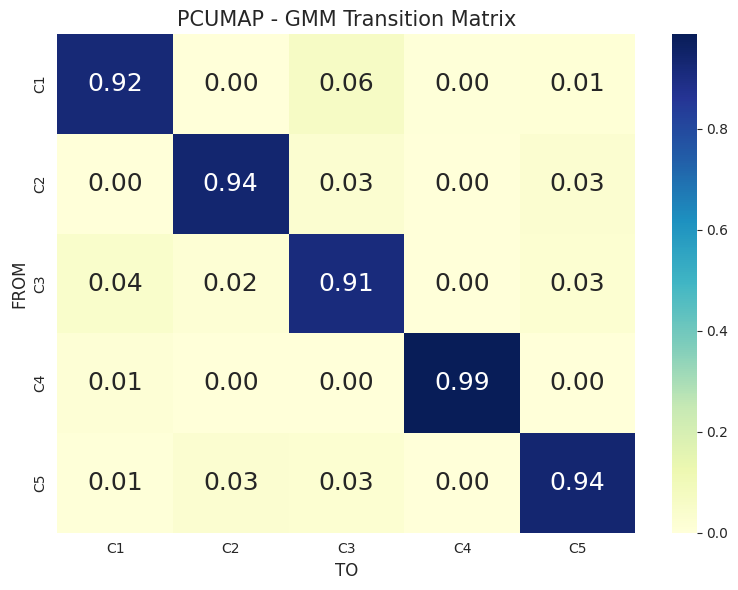

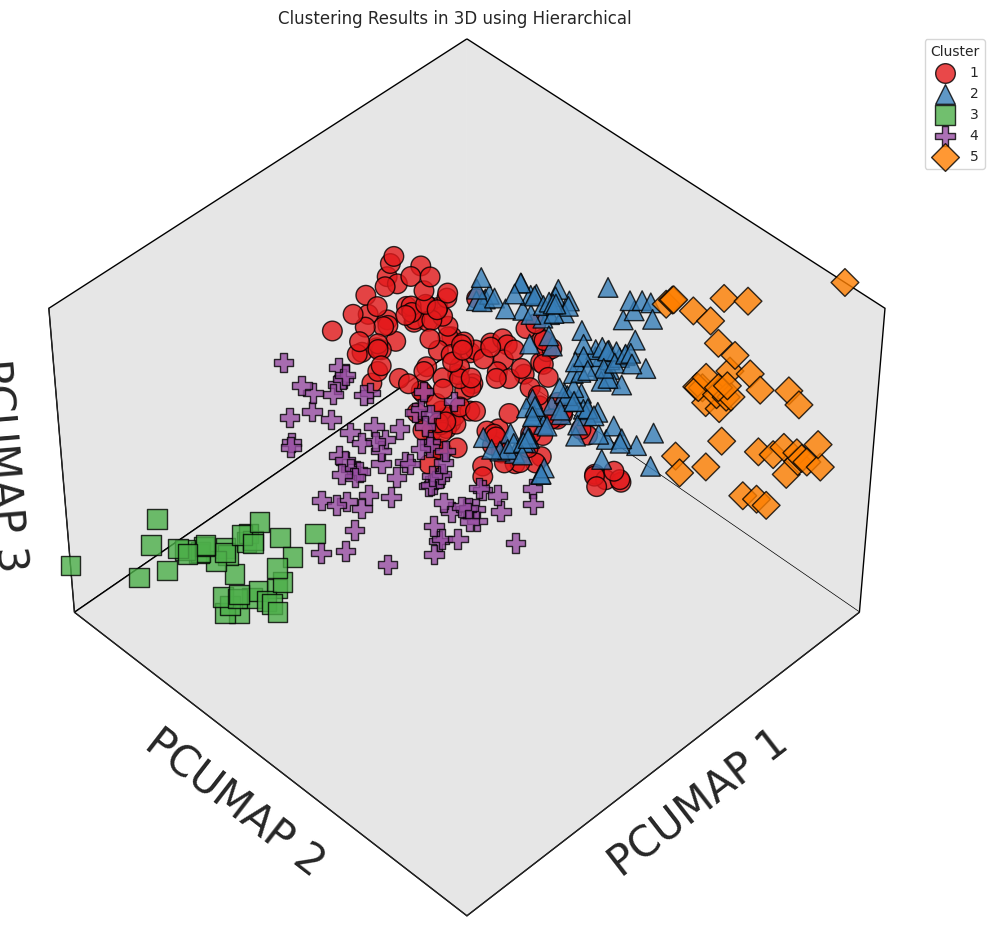

         Method  Silhouette    CH Score  DB Score  Avg Entropy  Avg Sharpness  \
0           FCM    0.348825  382.207242  0.964262     5.397043       0.111984   
1           GMM    0.300840  293.078049  0.989370     0.264557       0.835621   
2  Hierarchical    0.316011  334.744611  1.057115          NaN            NaN   

   Avg Max Prob  
0      0.970220  
1      0.893226  
2           NaN  


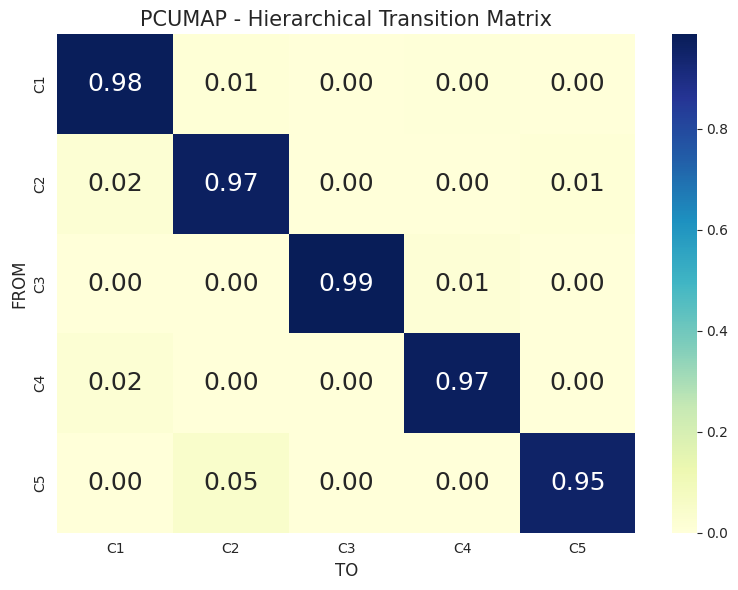

In [79]:
if method_name == 'PCUMAP':
    #cluster on PCUMAP embedding
    clustering_results, membership_dict = cluster_umap_embedding(embedding, n_clusters=5)

    for cluster_method, cluster_labels in clustering_results.items():
        plot_cluster_results(embedding, cluster_labels, cluster_method)

        # hard and soft  metrics
        cluster_metrics_df = evaluate_clustering(embedding, clustering_results, membership_dict=membership_dict)
        cluster_metrics_df.to_csv('umap_clustering_metrics.csv', index=False)
        print(cluster_metrics_df)

        # transition matrix
        transition_matrix, unique_labels = compute_transition_matrix(embedding, pd.Series(cluster_labels))

        plt.figure(figsize=(8, 6))
        sns.heatmap(transition_matrix, annot=True, fmt='.2f', cmap='YlGnBu',
                    xticklabels=[f"C{i+1}" for i in unique_labels],
                    yticklabels=[f"C{i+1}" for i in unique_labels],
                    annot_kws={"size": 18})
        plt.title(f'{method_name} - {cluster_method} Transition Matrix', fontsize=15)
        plt.xlabel('TO', fontsize=12)
        plt.ylabel('FROM', fontsize=12)
        plt.tight_layout()
        plt.savefig(f'transition_matrix_{method_name}_{cluster_method}.png', dpi=300)
        plt.show()

        if cluster_method == 'FCM':

            probs = membership_dict['FCM'].T

            plot_max_membership_by_ground_truth(probs, label_codes, method_name='FCM')

            transitional_spines = find_transitional_spines(probs, df, threshold=0.35)

            print(f"Found {len(transitional_spines)} transitional spines with high membership in ≥2 clusters:")
            for spine_idx, cluster_ids in transitional_spines:
                print(f"  Spine {spine_idx} → Clusters: {cluster_ids}")

/tmp/ipython-input-1098702491.py:4: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / (cm.sum(axis=1, keepdims=True)) * 100  # percent-wise


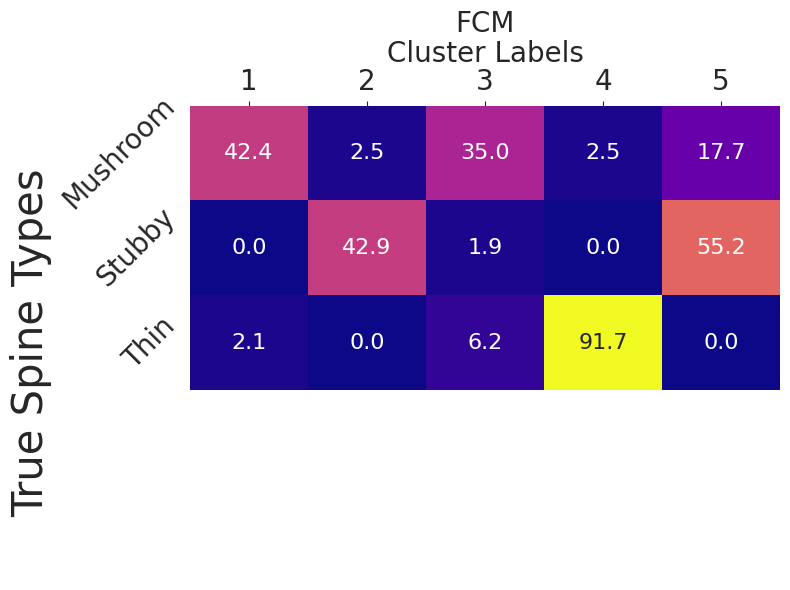

/tmp/ipython-input-1098702491.py:4: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / (cm.sum(axis=1, keepdims=True)) * 100  # percent-wise


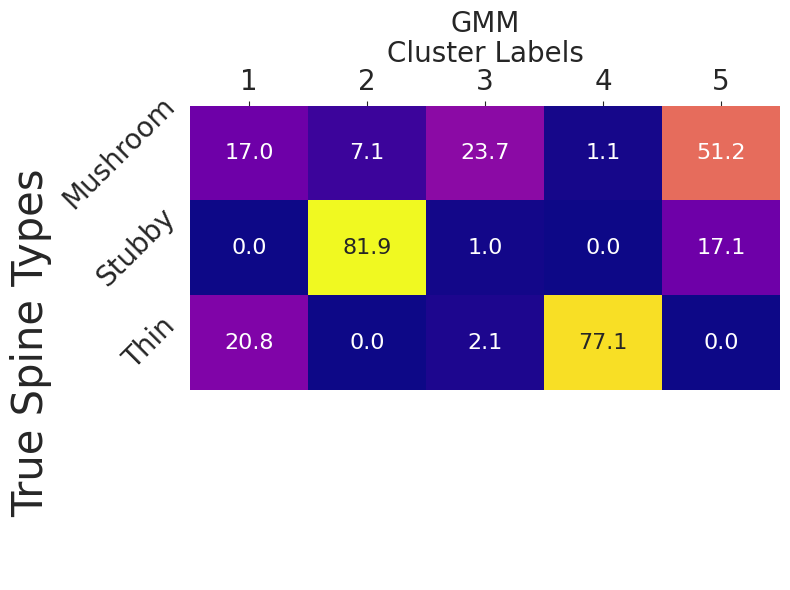

/tmp/ipython-input-1098702491.py:4: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / (cm.sum(axis=1, keepdims=True)) * 100  # percent-wise


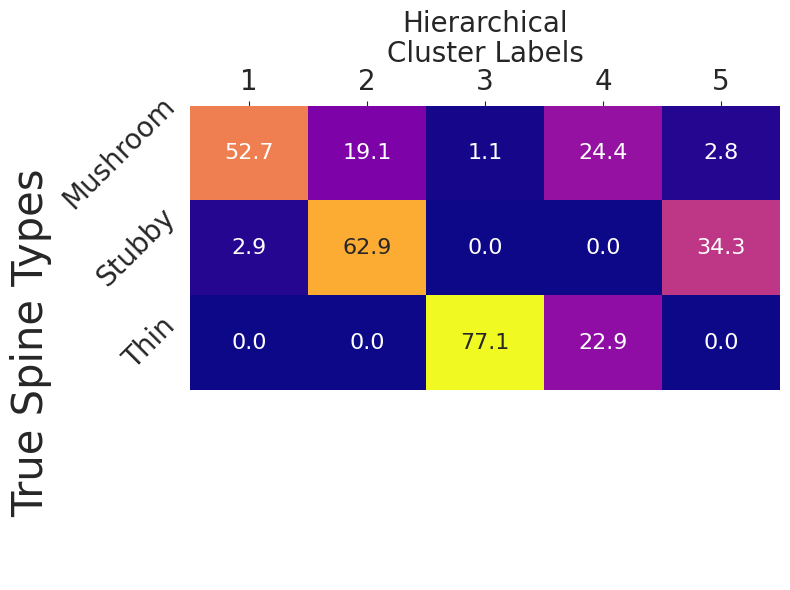

In [80]:
def plot_confusion_heatmap(true_labels, cluster_labels, method_name, class_names=None, normalize=True):
    cm = confusion_matrix(true_labels, cluster_labels)
    if normalize:
        cm = cm.astype('float') / (cm.sum(axis=1, keepdims=True)) * 100  # percent-wise

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.1f', cmap='plasma', cbar=False,
                xticklabels=[f'{i+1}' for i in range(cm.shape[1])],  # Change x-axis labels to 1-5
                yticklabels=[f'{i+1}' for i in range(cm.shape[0])] if class_names is None else class_names,
                annot_kws={'size': 16})

    plt.gca().xaxis.set_ticks_position('top')

    plt.xlabel("Cluster Labels", fontsize=20)
    plt.ylabel("True Spine Types", fontsize=30)
    plt.gca().xaxis.set_label_position('top')
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=45, fontsize=20)

    plt.title(f"{method_name}", fontsize=20)
    plt.tight_layout()
    plt.savefig(f'{method_name}_cluster_assignments.png', dpi=300)
    plt.show()

spine_labels = ['Mushroom', 'Stubby', 'Thin']

for method, cluster_labels in clustering_results.items():
    plot_confusion_heatmap(true_labels=label_codes,  # ground truth labels (0,1,2)
                           cluster_labels=cluster_labels,  # predicted cluster assignments
                           method_name=method,
                           class_names=spine_labels)


[TorchDR] Initializing DR model PCUMAP. 
[TorchDR] Affinity : computing the input affinity matrix of UMAP.
[TorchDR] Affinity : sparsity mode enabled, computing 30 nearest neighbors. If this step is too slow, consider reducing the dimensionality of the data using PCA or disabling sparsity.
[TorchDR] 8 evaluation(s) to set the bounds of the root search.


[TorchDR] Root search : mean abs value =  2.01e-05 (std =  4.04e-05) :   3%|▎         | 3/100 [00:00<00:00, 282.84it/s]
[TorchDR] DR Loss : 9.84e+02 | Grad norm : 1.39e+01 : 100%|██████████| 2000/2000 [00:38<00:00, 51.81it/s]


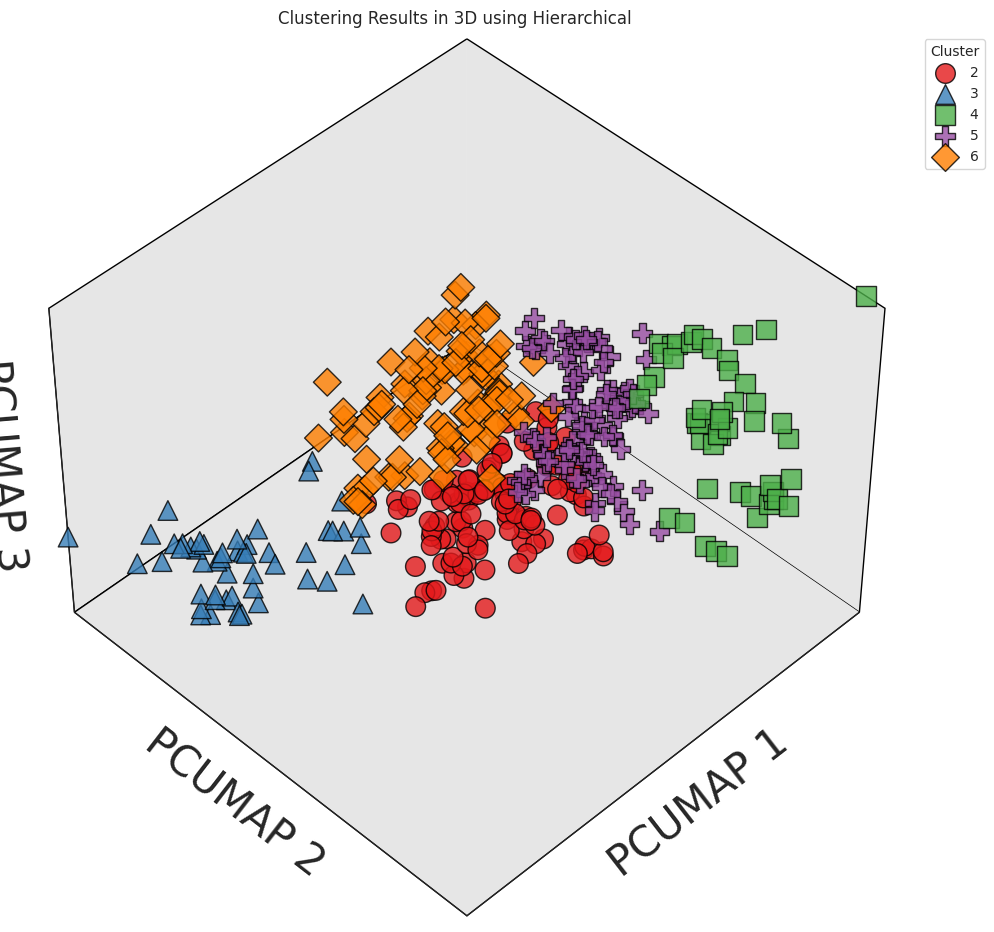

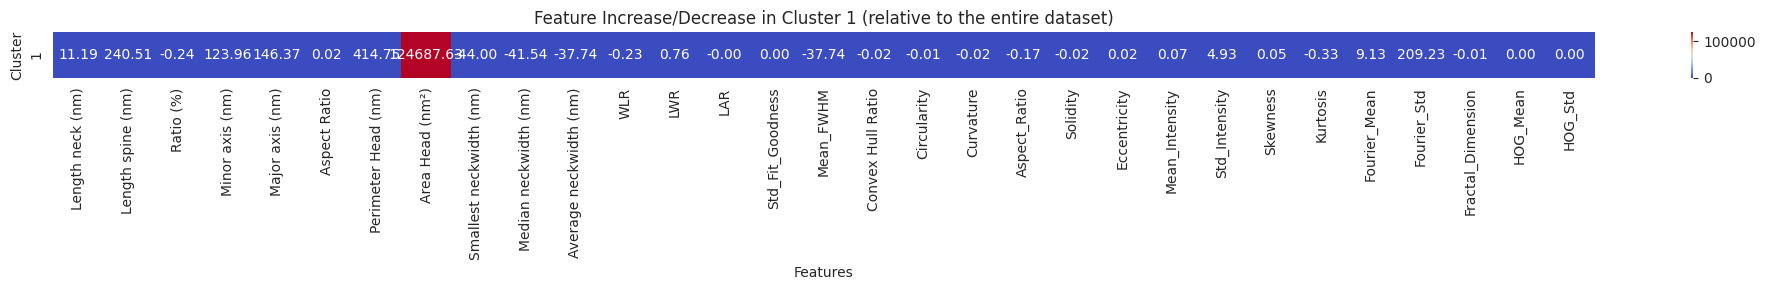

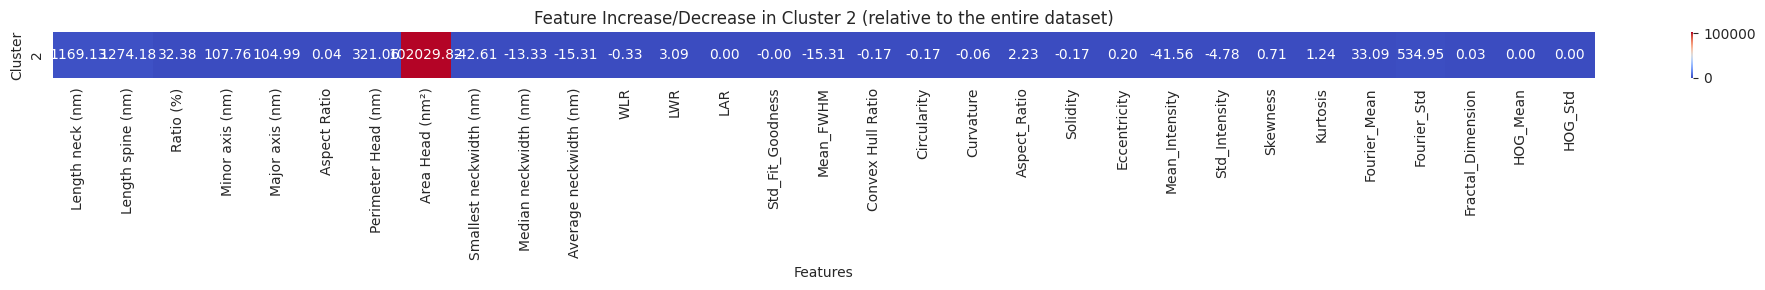

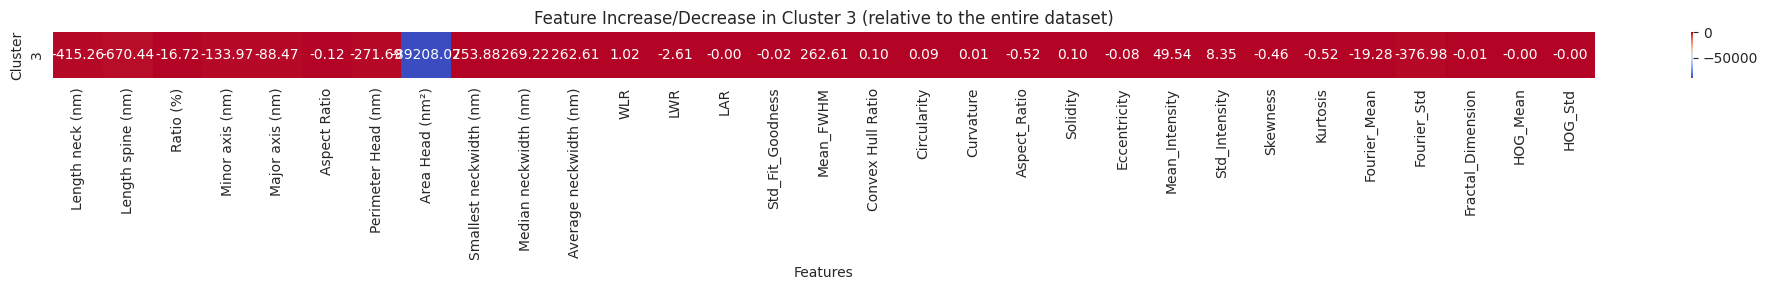

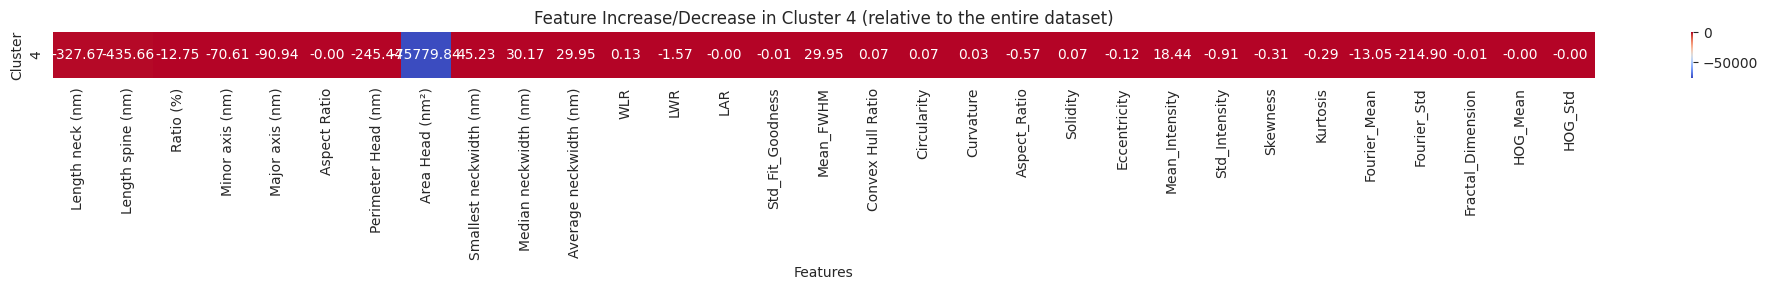

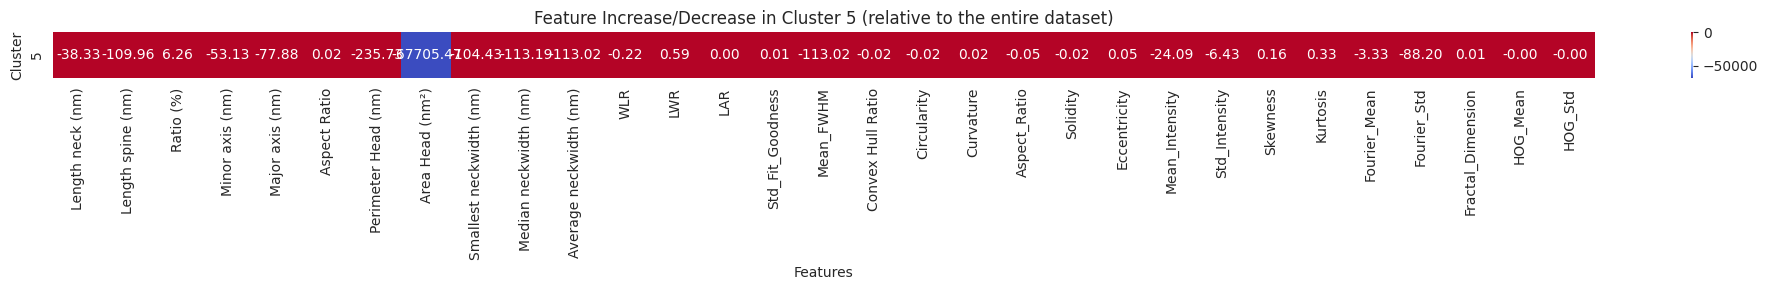

Spine numbers and their cluster assignments have been exported to 'spine_cluster_assignments.csv'.
Spine numbers, labels, and cluster assignments have been exported to 'spine_cluster_assignments_with_labels.csv'.


In [82]:
#final pipeline to compute feature contributions and spines in each
df = spine_features
df = df.dropna()

outliers_to_drop = [54,56,203,441,429,436,431,418,338,109]
df = df[~df['Spine Name'].isin(outliers_to_drop)]

features = df.drop(['Spine Name', 'Spine Label'], axis=1)
labels = df['Spine Label']
feature_names = features.columns.tolist()

label_codes = labels.astype('category').cat.codes
unique_labels = labels.unique()

scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

pcumap = PCUMAP(
        n_components=3,
        n_neighbors=30,
        min_dist=0.3,
        correlation_loss_weight=1000,
        beta=10,
        pearson=True,
        spearman=False,
        verbose=True,
        random_state=1178
)
pcumap_result = pcumap.fit_transform(scaled_features,  y=labels)
n_clusters=5
fcm = FCM(n_clusters=n_clusters)
fcm.fit(pcumap_result)
cluster_labels = fcm.predict(pcumap_result)+1

plot_cluster_results(pcumap_result, cluster_labels, cluster_method)
df['Cluster'] = cluster_labels

cluster_means = df.groupby('Cluster')[feature_names].mean()
overall_means = df[feature_names].mean()

feature_differences = cluster_means - overall_means

for cluster in range(1, n_clusters + 1):
    plt.figure(figsize=(20,3))
    cluster_data = feature_differences.loc[cluster]  # Get the feature differences for the current cluster
    sns.heatmap(cluster_data.to_frame().T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f"Feature Increase/Decrease in Cluster {cluster} (relative to the entire dataset)")
    plt.xlabel("Features")
    plt.ylabel("Cluster")
    plt.tight_layout()
    plt.savefig(f'cluster_{cluster}_feature_changes_heatmap.png', dpi=300)
    plt.show()

spine_clusters = df[['Spine Name', 'Cluster']]
spine_clusters = spine_clusters.sort_values(by='Cluster', ascending=True)

spine_clusters.to_csv('spine_cluster_assignments.csv', index=False)

print("Spine numbers and their cluster assignments have been exported to 'spine_cluster_assignments.csv'.")
spine_clusters = df[['Spine Name', 'Spine Label', 'Cluster']]
spine_clusters = spine_clusters.sort_values(by='Cluster', ascending=True)

spine_clusters.to_csv('spine_cluster_assignments_with_labels.csv', index=False)
print("Spine numbers, labels, and cluster assignments have been exported to 'spine_cluster_assignments_with_labels.csv'.")

label_counts_per_cluster = spine_clusters.groupby(['Cluster', 'Spine Label']).size().unstack(fill_value=0)

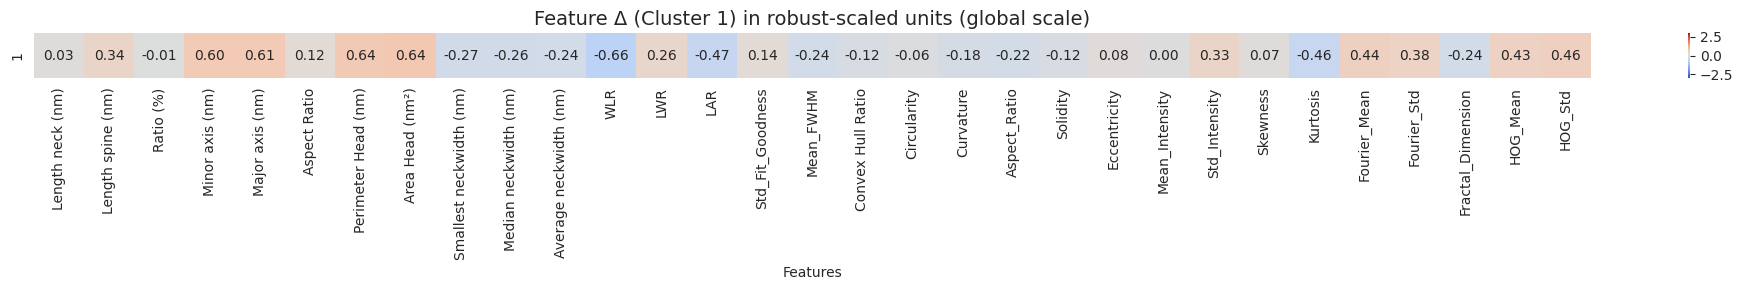

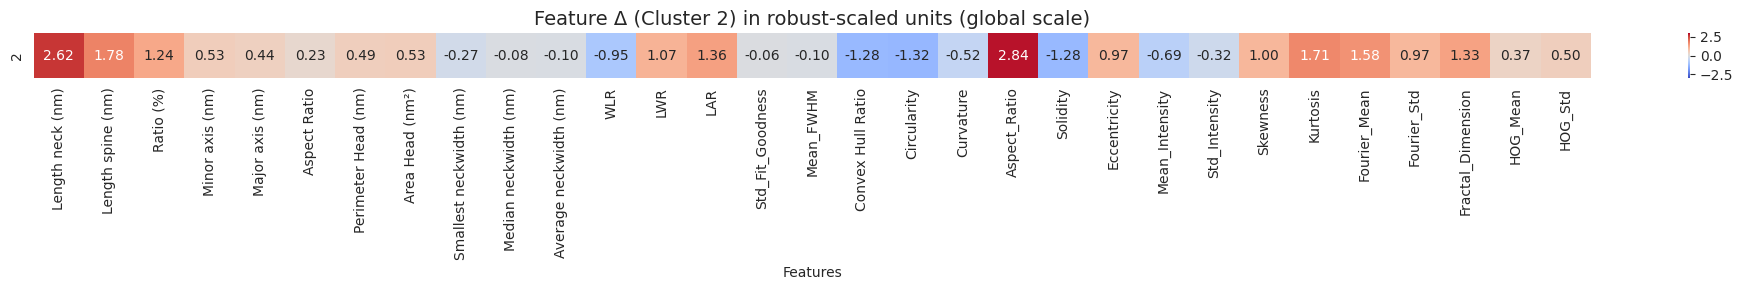

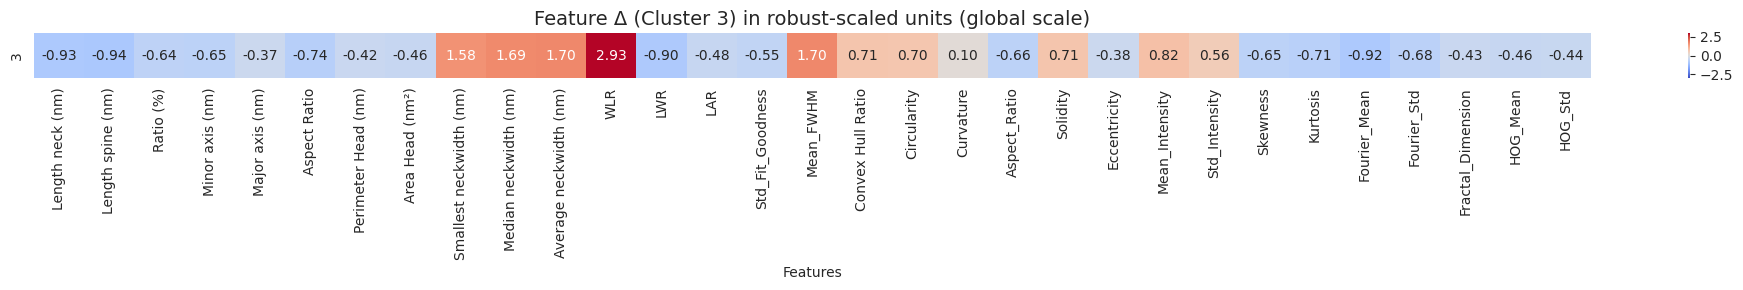

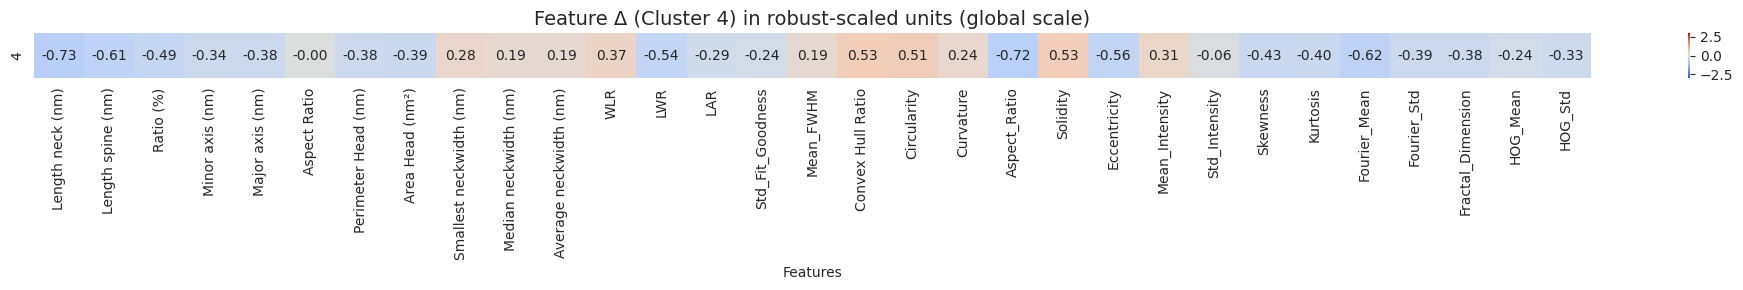

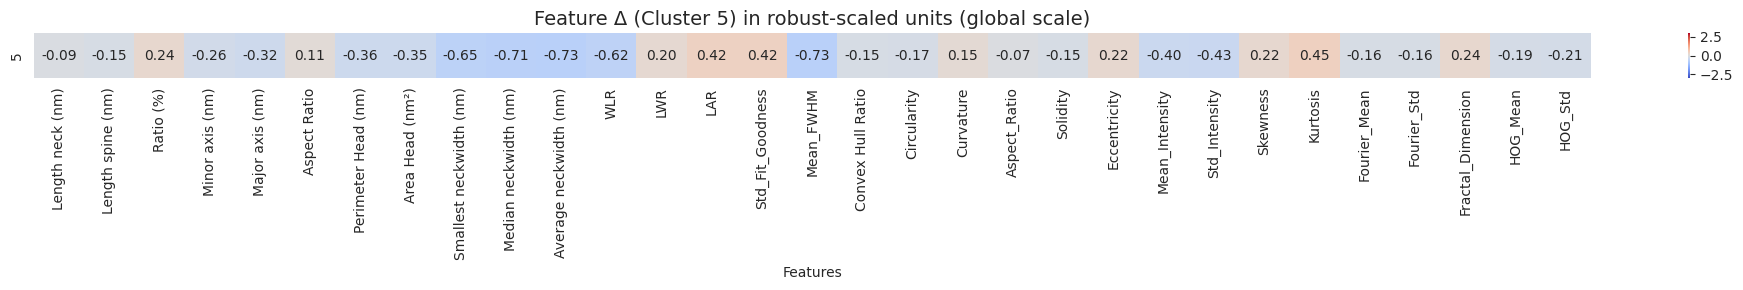

/tmp/ipython-input-1566913178.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


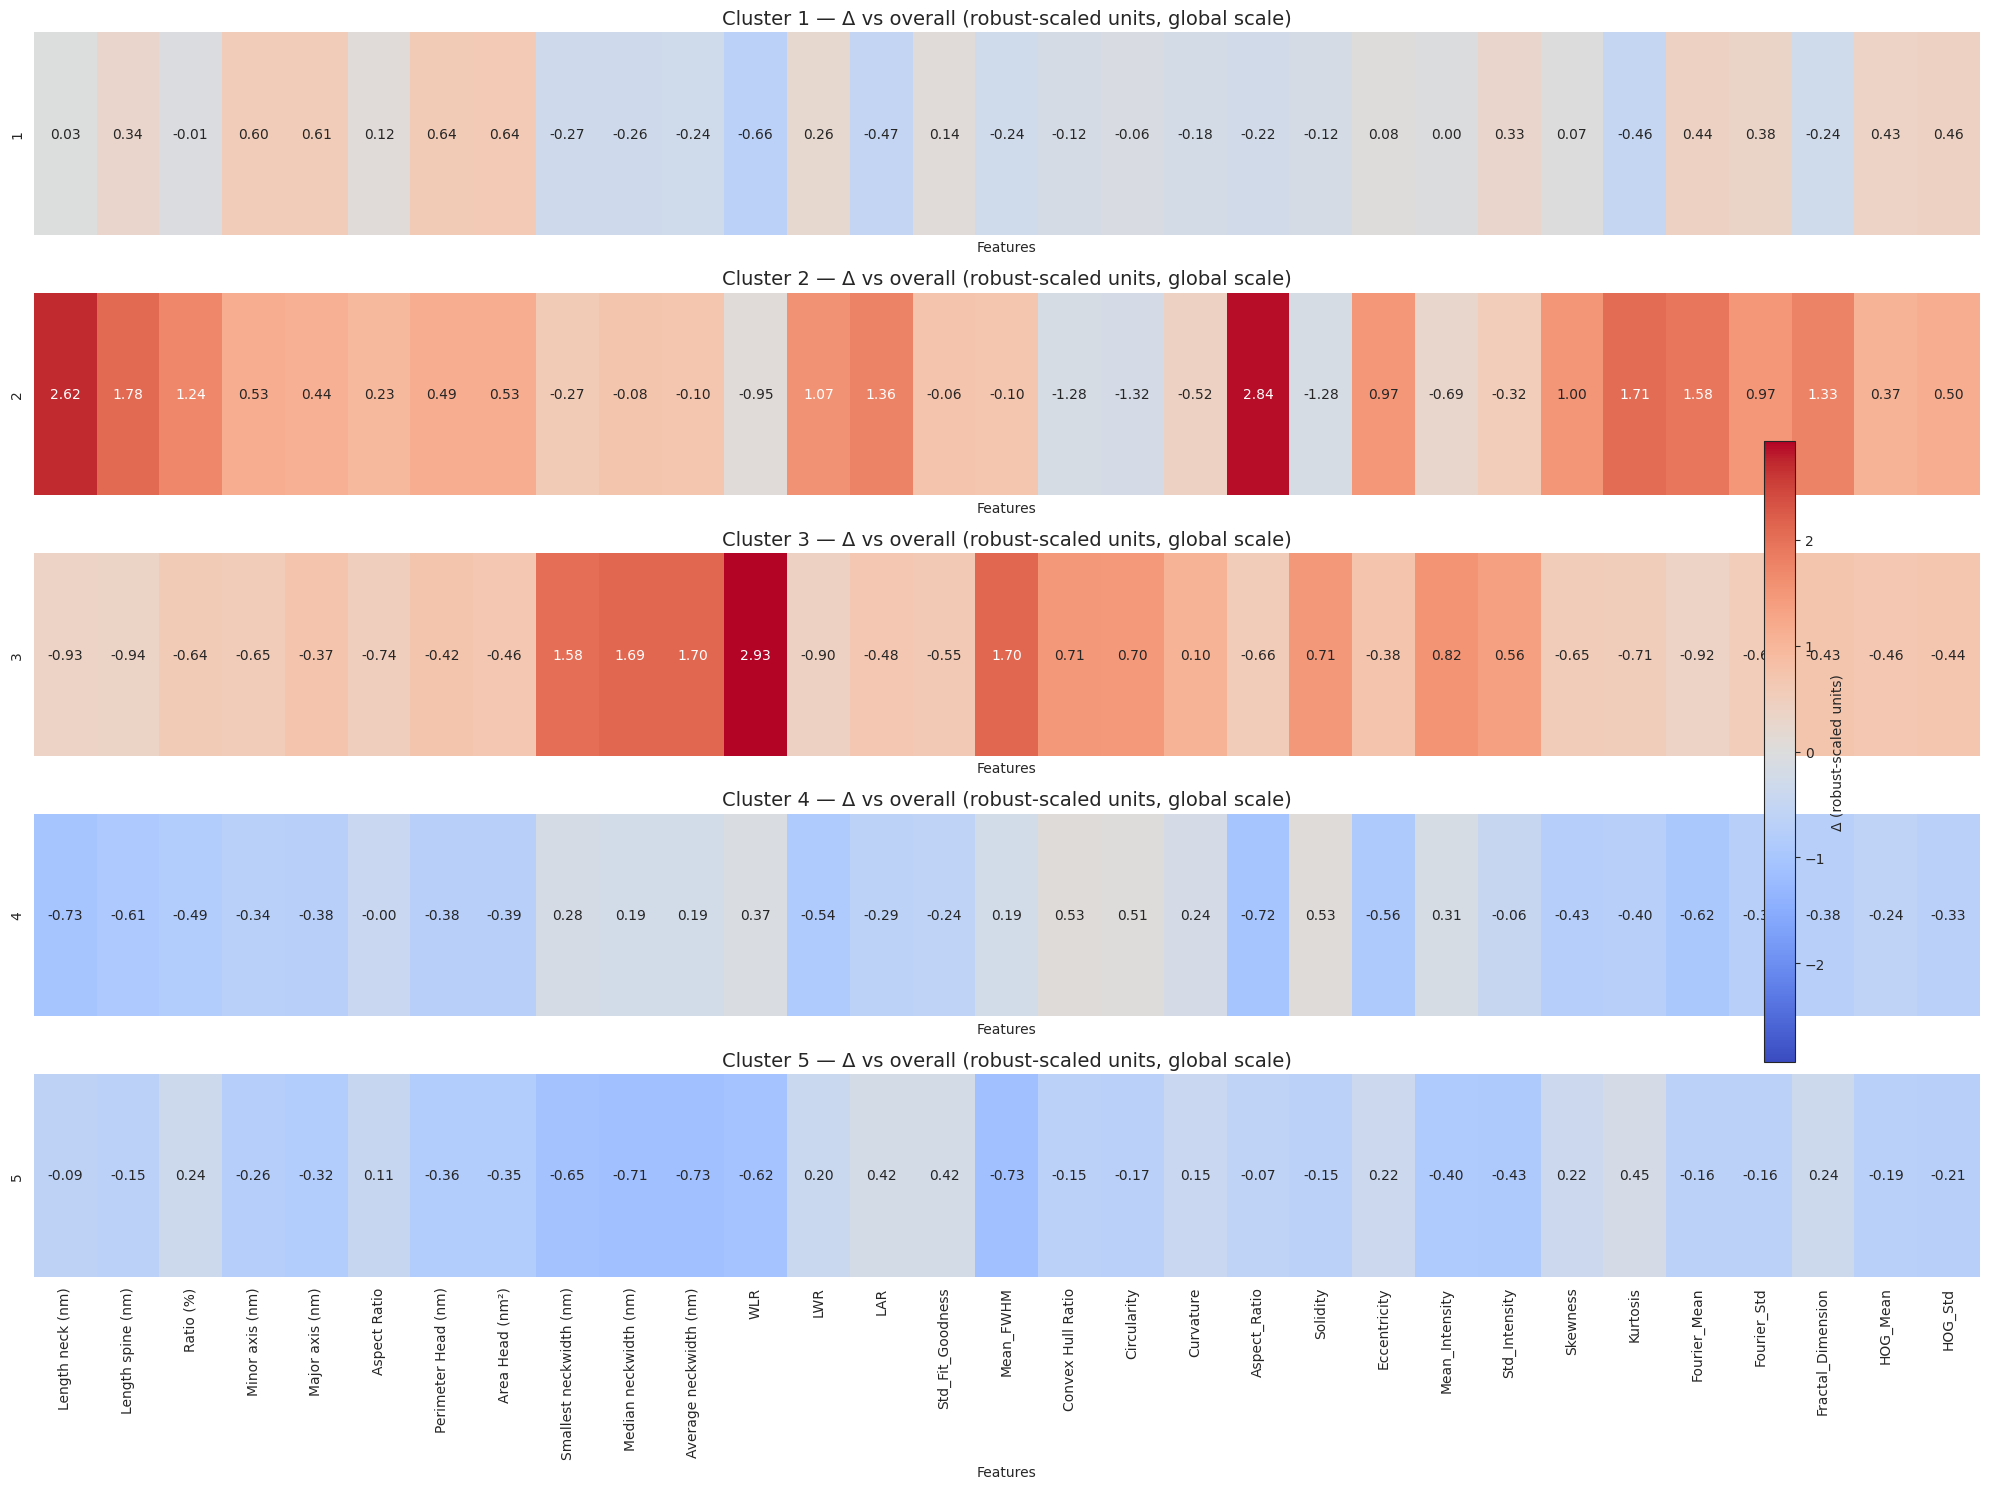

Saved -> cluster_feature_differences_scaled_GLOBAL.csv


In [91]:
# scaled feature distributions
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=feature_names)
cluster_means_scaled = scaled_features_df.groupby(df['Cluster']).mean()

# overall mean in scaled
overall_means_scaled = scaled_features_df.mean(axis=0)
# feature diffs
feature_diffs = cluster_means_scaled - overall_means_scaled

# global color scale
absmax = np.nanmax(np.abs(feature_diffs.values))
vmin, vmax = -absmax, absmax

sns.set_style("white")
n_clusters = feature_diffs.shape[0]
for cluster in feature_diffs.index:
    plt.figure(figsize=(20, 3))
    row = feature_diffs.loc[cluster]
    ax = sns.heatmap(
        row.to_frame().T,
        annot=True, fmt='.2f',
        cmap='coolwarm',
        vmin=vmin, vmax=vmax, center=0,
        cbar=True
    )
    ax.set_title(f"Feature Δ (Cluster {cluster}) in robust-scaled units (global scale)", fontsize=14)
    ax.set_xlabel("Features"); ax.set_ylabel("")
    plt.tight_layout()
    plt.savefig(f'cluster_{cluster}_feature_changes_heatmap_GLOBAL.png', dpi=300)
    plt.show()

clusters = list(feature_diffs.index)
fig, axes = plt.subplots(nrows=len(clusters), ncols=1, figsize=(20, 3*len(clusters)), sharex=True)
axes = np.atleast_1d(axes)

norm = plt.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.get_cmap('coolwarm')

for ax, cluster in zip(axes, clusters):
    row = feature_diffs.loc[cluster]
    sns.heatmap(
        row.to_frame().T,
        ax=ax,
        annot=True, fmt='.2f',
        cmap=cmap, norm=norm, center=0,
        cbar=False
    )
    ax.set_title(f"Cluster {cluster} — Δ vs overall (robust-scaled units, global scale)", fontsize=14)
    ax.set_xlabel("Features"); ax.set_ylabel("")

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
                    ax=axes, orientation='vertical', fraction=0.02, pad=0.01)
cbar.set_label("Δ (robust-scaled units)", rotation=90)

plt.tight_layout()
plt.savefig('cluster_feature_changes_heatmap_GLOBAL_COMPOSITE.png', dpi=300)
plt.show()


feature_diffs.round(3).to_csv('cluster_feature_differences_scaled_GLOBAL.csv')


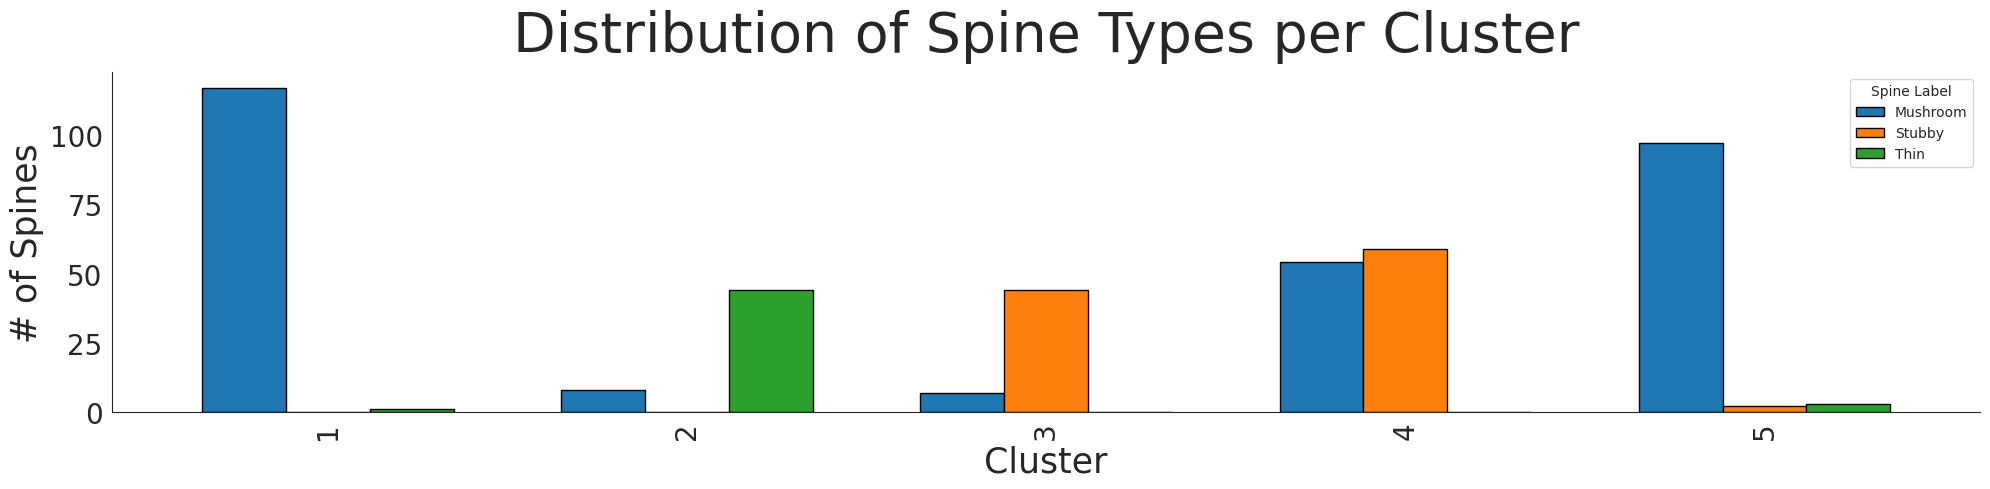

In [86]:
# plotting spine type distribution per cluster
sns.set_style("white")

fig, ax = plt.subplots(figsize=(20, 5))
colors = sns.color_palette("tab10", n_colors=label_counts_per_cluster.shape[1])

label_counts_per_cluster.plot(
    kind='bar',
    stacked=False,
    color=colors,
    width=0.7,
    edgecolor='black',
    ax=ax
)
ax.set_title('Distribution of Spine Types per Cluster', fontsize=40, pad=15)
ax.set_xlabel('Cluster', fontsize=25)
ax.set_ylabel('# of Spines', fontsize=25)
ax.set_xticklabels([str(i) for i in label_counts_per_cluster.index], fontsize=20)
#ax.legend(title='Spine Type', fontsize=12, title_fontsize=13, loc='upper right')

ax.tick_params(axis='both', which='major', labelsize=20)
sns.despine()

plt.tight_layout()
plt.savefig('spine_types_per_cluster_cleaned.png', dpi=600)
plt.show()